# <span style="color : #20B2AA"><u>Projet 6 - Analiser les ventes d'une librairie</u></span>

# <span style="color : #FFA500"><u>1 - Importations.</u></span>

## <span style="color : blue">1.1 - Librairies.</span>

In [71]:
import pandas as pd
import numpy as np
#import tkinter
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("tkAgg")
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport
#import scipy.stats as st
#import warnings
#warnings.filterwarnings("ignore")

In [72]:
#!pip show pandas-profiling

## <span style="color : blue">1.2 - Données.<span>

In [73]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

# <span style="color : #FFA500"><u>2 - Analyse des dataframes.</u></span>

## <span style="color : blue">2.1 - Dataframe "customers".</span>

### <span style="color : #8470FF">2.1.1 Visualisation des séries.</span>

In [74]:
customers.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [259]:
profile = ProfileReport(customers, title="Profiling Report")
profile.to_widgets()  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### <span style="color : #8470FF">2.1.2 - Informations sur le fichier client et son analyse.</span>

In [76]:
customers.describe(include ="all")

client_id   sex        birth
count       8623  8623  8623.000000
unique      8623     2          NaN
top       c_4410     f          NaN
freq           1  4491          NaN
mean         NaN   NaN  1978.280877
std          NaN   NaN    16.919535
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000

In [77]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


#### <span style="color : red">Le dataframe "customers" compte 8623 entrées (indexées de 0 à 8622) ne comportant aucune valeur nulle, et 3 séries, dont 1 de type "float" et 2 de type "object".</span>
#### <span style="color : red">Absence de doublon sur la variable "client_id" qui fait office de clé primaire: les 8623 entrées ont autant de valeur unique.</span>
#### <span style="color : red">Absence d'outlier sur la variable birth qui s'étend de 1929 à 2004, ce qui est cohérent.</span>

### <span style="color : #8470FF">2.1.3 - Confirmation de l'unicité de la clé primaire.</span>

In [78]:
customers["client_id"].duplicated().sum()

0

#### <span style="color : red">La clé primaire "client_id" ne comporte donc bien aucun doublon.</span> 

In [79]:
nombre_clients = customers["client_id"].count()
print("La boutique possède",nombre_clients,"clients différents")

La boutique possède 8623 clients différents


## <span style="color : blue">2.2 - Dataframe "products".</span>

### <span style="color : #8470FF">2.2.1 Visualisation des séries.</span>

In [80]:
products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

### <span style="color : #8470FF">2.2.2 - Informations sur le fichier produits et son analyse.</span>

In [81]:
products.describe(include="all")

id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top     0_1421          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.060000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000

In [82]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [83]:
products[products["price"] < 0]

id_prod  price  categ
731     T_0   -1.0      0

#### <span style="color : red">- Le dataframe "products" compte 3287 entrées (indexées de 0 à 3286) ne comportant aucune valeur nulle, et 3 séries, dont 1 de type "float", 1 de type "int" et 1 de type "object".</span>
#### <span style="color : red">- Absence de doublon sur la variable "id_prod" qui fait office de clé primaire: les 3287 entrées ont autant de valeur unique.</span>
#### <span style="color : red">- 1 produit comporte une valeur négative: T_0. Ce n'est pas forcément une incohérence, car il peut sagir, par exemple, d'une remise ou d'un produit test.</span>

### <span style="color : #8470FF">2.2.3 - Confirmation de l'unicité de la clé primaire.</span>

In [84]:
products["id_prod"].duplicated().sum()

0

#### <span style="color : red">- La clé primaire "client_id" ne comporte donc bien aucun doublon.</span> 

In [85]:
nombre_references = products["id_prod"].count()
print("Le catalogue contient",nombre_references,"références différentes de livres")

Le catalogue contient 3287 références différentes de livres


### <span style="color : #8470FF">2.2.4 - Analyse de la série "price".</span>

In [86]:
products["price"].nunique()

1455

In [87]:
products["price"].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

#### <span style="color : red">- Il y a 1455 valeurs différentes sur les 3287 références comprises dans le catalogue de produits, ayant des valeurs de -1.0 à 300.</span>

### <span style="color : #8470FF">2.2.5 - Analyse de la série "categ".</span>

In [88]:
products["categ"].nunique()

3

In [89]:
products["categ"].unique()

array([0, 1, 2], dtype=int64)

#### <span style="color : red">- La série "categ" comporte 3 types de valeurs différentes: 0, 1 et 2.</span>

## <span style="color : blue">2.3 - Dataframe "transactions".</span>

### <span style="color : #8470FF">2.3.1 Visualisation des séries.</span>

In [90]:
transactions.head()

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

### <span style="color : #8470FF">2.3.2 - Informations sur le fichier transactions et son analyse.</span>

In [91]:
transactions.describe(include="all")

id_prod                             date session_id client_id
count   679532                           679532     679532    679532
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      2252                               13        200     25488

In [92]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


#### <span style="color : red">Le dataframe "transactions" compte 679.532 entrées (indexées de 0 à 679.531) ne comportant aucune valeur nulle, et 4 séries, toutes de type "object".</span>

#### <span style="color : green">On peut remarquer, dans le "describe", que des dates sont identifiées comme "test":</span>

### <span style="color : #8470FF">2.3.3 - Visualisation des valeurs négatives représentées par "T_0" dans la série "id_prod".</span>

In [93]:
val_neg = transactions.loc[transactions["id_prod"]=="T_0"]
print(val_neg)

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]


#### <span style="color : red">- Le dataframe "transactions" comporte 200 fois la valeur négative représentée par l' id_prod "T_0" et on comme "client_id" : cto_0 et ct_1. Ces valeurs ne sont pas une erreur mais désignent des lignes de test (visible dans la série "date", que je vais supprimer dans les dataframes concernés) .</span>

# <span style="color : #FFA500"><u>3 - Nettoyage des données.</u></span>

## <span style="color : blue">3.1 - Suppression des lignes inutiles.</span>

### <span style="color : #8470FF">3.1.1 - Dans le dataframe "products"  : tous les "id_prod" = "T_0".</span>

In [94]:
products.drop(products.loc[products["id_prod"] == "T_0"].index, inplace =True)

#### Vérification :

In [95]:
valeurs_neg_products = products.loc[products["id_prod"] == "T_0"]
print (valeurs_neg_products)

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


#### <span style="color : red">- La valeur négative a bien été supprimée du dataframe "products".</span>

### <span style="color : #8470FF">3.1.2 - Dans le dataframe "customers": tous les "client_id" = "ct_0" et "ct_1".</span>

In [96]:
customers.drop(customers[(customers["client_id"] == "ct_0") | (customers["client_id"] == "ct_1")].index, inplace=True)

#### Vérifications :

In [97]:
clients_ct_0 = customers.loc[customers["client_id"] == "ct_0"]
print(clients_ct_0)

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


In [98]:
clients_ct_1 = customers.loc[customers["client_id"] == "ct_1"]
print(clients_ct_1)

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


#### <span style="color : red">- La valeur négative a bien été supprimée du dataframe "products".</span>

### <span style="color : #8470FF">3.1.3 - Dans le dataframe "transactions".</span>

In [99]:
transactions.drop(transactions.loc[transactions["id_prod"] == "T_0"].index, inplace = True)

#### Vérification :

In [100]:
valeurs_neg_transactions = transactions.loc[transactions["id_prod"] == "T_0"]
print (valeurs_neg_transactions)

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


#### <span style="color : red">- Les valeurs négatives ont bien été supprimées du dataframe "transactions".</span>

## <span style="color : blue">3.2 - Recherche des valeurs aberrantes dans la série "price" du dataframe "transactions".</span >

### <span style="color : #8470FF">3.2.1 - Création de la fonction"outliers" pour la recherche des outliers avec les écarts interquartiles (IQR).</span>

In [101]:
def outliers (s): # "s" représente le prix
    iqr  = (np.quantile(s, 0.75))-(np.quantile(s, 0.25)) # définition du Delta Quartile sup. et quartile inf.
    upper_bound = np.quantile(s, 0.75) + (1.5*iqr) # recherche des valeurs >Q3 + 1.5*IQR
    lower_bound = np.quantile(s, 0.25) - (1.5*iqr) # recherche des valeurs <Q1 - 1.5*IQR
    f = [] # création d'une liste "f" vide.
    for i in s:
        if i > upper_bound :
            f.append(i) # Si le prix > Q3 ->valeur aberrante supérieure
        elif i < lower_bound:
            f.append(i) # Si le prix < Q1 -> valeur aberrante inférieure
    sums = len(f) # nombre d' outliers
    ratio = len(f)/len(s)*100 # proportion d'outliers
    d = {
        "iqr" : iqr,
        "upper_bound" : upper_bound,
        "lower_bound" : lower_bound,
        "total_outliers": sums,
        "percent_outliers" : ratio}
    d = pd.DataFrame(d.items(),columns = ["sub", "values"])
    return (d)

### <span style="color : #8470FF">3.2.2 - Information sur les outliers (depuis la fonction outliers)</span>

In [102]:
outliers(products.price)

sub      values
0               iqr   16.000000
1       upper_bound   46.990000
2       lower_bound  -17.010000
3    total_outliers  302.000000
4  percent_outliers    9.190505

#### <span style="color : red">L'écart interquartile représente 16€, et lesvaleurs aberrantes sont au nombre de 302 (représentant 9,19% des prix), avec pour  premier outlier supérieur à 46,99€. Les outliers inférieurs étant en valeurs négatives, il n'y a pas à en tenir compte, car inexistants.</span>

### <span style="color : #8470FF">3.2.3 - Visualisation des valeurs aberrantes.</span>

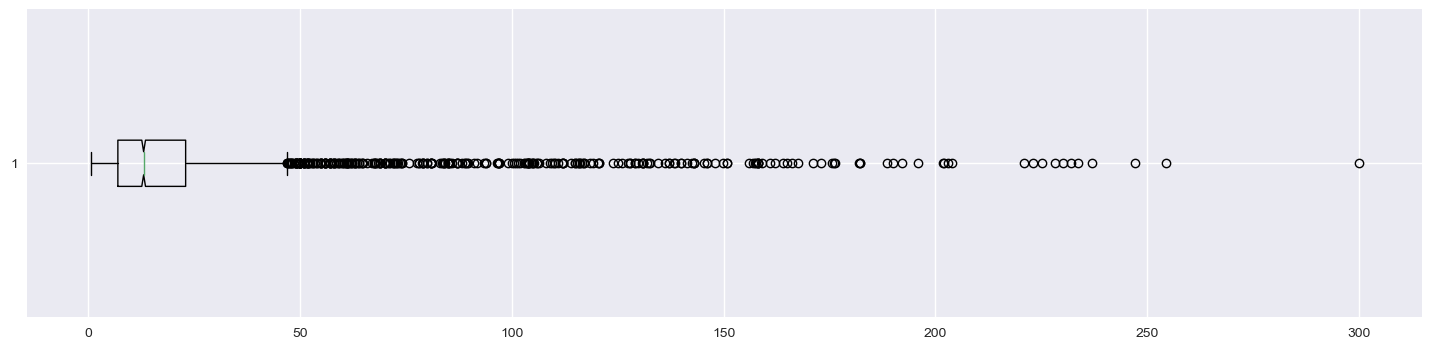

In [103]:
figure = plt.figure(figsize = (18,4))
plt.boxplot(products["price"], notch = True, vert =0)
plt.show()

### <span style="color : #8470FF">3.2.4 - Liste des outliers</span>

In [104]:
val_aberr = (products.loc[products ["price"]>46.99])
val_aberr.sort_values(by=["price"], ascending= False)

id_prod   price  categ
947      2_2  300.00      2
724     2_76  254.44      2
394    2_158  247.22      2
1436   2_167  236.99      2
2779    2_30  233.54      2
...      ...     ...    ...
954    1_664   47.83      1
1507   1_254   47.69      1
3169   1_626   47.35      1
2966   1_620   47.30      1
49      1_48   47.22      1

[300 rows x 3 columns]

## <span style="color : blue">3.3 - Visualisation des valeurs en doublon dans le df "transactions"</span>

### <span style="color : #8470FF">3.3.1 - Comptage des id_client présents, regroupés par id_prod</span>

In [105]:
df_doublons = transactions.groupby(["id_prod", "client_id"]).agg({"client_id" : "count"})
df_doublons

client_id
id_prod client_id           
0_0     c_1004             1
        c_1011             4
        c_1020             3
        c_1037             4
        c_1052             2
...                      ...
2_97    c_4958             2
        c_5899             3
2_98    c_5967             1
2_99    c_5828             4
        c_7135             3

[307073 rows x 1 columns]

### <span style="color : #8470FF">3.3.2 - Visualisation des doublons d'un id_client pour un même id_prod, pris au hasard</span>

In [106]:
doublon = transactions[(transactions["id_prod"] == "0_0") & (transactions["client_id"] == "c_1011")]
doublon

id_prod                        date session_id client_id
97887      0_0  2022-03-18 16:40:10.068303   s_180968    c_1011
257391     0_0  2022-02-18 16:40:10.068303   s_167174    c_1011
334285     0_0  2022-04-18 16:40:10.068303   s_195932    c_1011
384049     0_0  2023-02-18 16:40:10.068303   s_343439    c_1011

## <span style="color : blue">3.4 - Création du dataframe "chiffre_affaire" par fusion des df "transactions" et "products".</pan>

In [107]:
chiffre_affaire = pd.merge(transactions,products, on = "id_prod", how = "outer", indicator =True)
chiffre_affaire.head()

id_prod                        date session_id client_id  price  categ  \
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   4.18    0.0   
1  0_1518  2021-09-26 12:37:29.780414    s_95811    c_6197   4.18    0.0   
2  0_1518  2021-05-06 17:14:43.117440    s_30782     c_682   4.18    0.0   
3  0_1518  2022-03-16 18:57:10.420103   s_180057    c_5932   4.18    0.0   
4  0_1518  2022-11-12 18:58:10.574853   s_296584    c_7217   4.18    0.0   

  _merge  
0   both  
1   both  
2   both  
3   both  
4   both

### <span style="color : #8470FF">3.4.1 - Vérification des correspondances de fusion des dataframes</span>

In [108]:
merge_ca = chiffre_affaire["_merge"].value_counts()
print(merge_ca)

both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64


### 242 lignes ne mergent pas (211 restent dans la table de gauche et 21 dans la table de droite. Je vais donc les supprimer

### <span style="color : #8470FF">3.4.2 - Elimination des lignes n'ayant pas mergé</span>


In [109]:
chiffre_affaire = chiffre_affaire[chiffre_affaire["_merge"] == "both"]

In [110]:
merge_ca = chiffre_affaire["_merge"].value_counts()
print(merge_ca)

both          679111
left_only          0
right_only         0
Name: _merge, dtype: int64


### Mon merge ne comporte bien que 679.111 lignes ayant fusionné (both)

In [111]:
#suppression de la colonne "_merge"
del chiffre_affaire["_merge"]

### <span style="color : #8470FF">3.4.3 - Informations sur le dataframe "chiffre_affaire".</span>

In [112]:
chiffre_affaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  float64
dtypes: float64(2), object(4)
memory usage: 36.3+ MB


### <span style="color : #8470FF">3.4.4 - Vérification sur la présence de valeurs nulles.</span>

In [113]:
chiffre_affaire.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64

## <span style="color : blue">3.5 - Création du dataframe "customers_profile" par la fusion des df "chiffre_affaire" et "customers".</span>


In [114]:
customers_profile = pd.merge(chiffre_affaire, customers, on = "client_id", how ="outer", indicator = True)
customers_profile.head()

id_prod                        date session_id client_id  price  categ sex  \
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   4.18    0.0   f   
1  0_1518  2021-07-20 13:21:29.043970    s_64849     c_103   4.18    0.0   f   
2  0_1518  2022-08-20 13:21:29.043970   s_255965     c_103   4.18    0.0   f   
3  0_1418  2022-06-18 01:49:37.823274   s_225411     c_103   8.57    0.0   f   
4  0_1418  2021-08-18 01:49:37.823274    s_77214     c_103   8.57    0.0   f   

   birth _merge  
0   1986   both  
1   1986   both  
2   1986   both  
3   1986   both  
4   1986   both

### <span style="color : #8470FF">3.5.1 - Vérification des correspondances de fusion des dataframes</span>

In [115]:
merged_customer = customers_profile["_merge"].value_counts()
print(merged_customer)

both          679111
right_only        21
left_only          0
Name: _merge, dtype: int64


### 21 lignes ne mergent pas et restent dans la table de droite. Je vais donc les supprimer

### <span style="color : #8470FF">3.5.2 - Elimination des lignes n'ayant pas mergé</span>

In [116]:
customers_profile=customers_profile[customers_profile["_merge"] == "both"]

In [117]:
merged_customer = customers_profile["_merge"].value_counts()
print(merged_customer)

both          679111
left_only          0
right_only         0
Name: _merge, dtype: int64


### Mon merge ne comporte bien que 679.111 lignes ayant fusionné (both)

In [118]:
#suppression de la colonne "_merge"
del customers_profile["_merge"]

### <span style="color : #8470FF">3.5.3 - Informations sur le dataframe "customers_profile".</span>

In [119]:
customers_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  float64
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 46.6+ MB


### <span style="color : purple">3.5.3.1 - Changement du type de données de la série "categ" en INT.</span>

In [120]:
customers_profile["categ"] = customers_profile["categ"].astype(int)

In [121]:
customers_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  int32  
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 44.0+ MB


### <span style="color : #8470FF">3.5.4 - Vérification sur la présence de valeurs nulles.</span>

In [122]:
customers_profile.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

## <span style="color : blue">3.6 - Transformation du format de la série "date" dans le df "customers_profile".</span>

### <span style="color : #8470FF">3.6.1 - Conservation de l'année, du mois et du jour.</span>

In [123]:
customers_profile["date"] = pd.to_datetime(customers_profile["date"]).dt.date

### <span style="color : #8470FF">3.6.2 - Conversion de la série "date" en datetime.</span>

In [124]:
customers_profile["date"] = pd.to_datetime(customers_profile["date"], format = "%Y-%m-%d",errors="coerce")
customers_profile.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

In [125]:
customers_profile.head()

id_prod       date session_id client_id  price  categ sex  birth
0  0_1518 2022-05-20   s_211425     c_103   4.18      0   f   1986
1  0_1518 2021-07-20    s_64849     c_103   4.18      0   f   1986
2  0_1518 2022-08-20   s_255965     c_103   4.18      0   f   1986
3  0_1418 2022-06-18   s_225411     c_103   8.57      0   f   1986
4  0_1418 2021-08-18    s_77214     c_103   8.57      0   f   1986

### <span style="color : #8470FF">3.6.3 - Création des séries "year", "month" et "day" à partir de la colonne "date".</span>

In [126]:
customers_profile["year"] = customers_profile["date"].dt.year
customers_profile["month"] = customers_profile["date"].dt.month
customers_profile["day"] = customers_profile["date"].dt.day

In [127]:
customers_profile.head()

id_prod       date session_id client_id  price  categ sex  birth  year  \
0  0_1518 2022-05-20   s_211425     c_103   4.18      0   f   1986  2022   
1  0_1518 2021-07-20    s_64849     c_103   4.18      0   f   1986  2021   
2  0_1518 2022-08-20   s_255965     c_103   4.18      0   f   1986  2022   
3  0_1418 2022-06-18   s_225411     c_103   8.57      0   f   1986  2022   
4  0_1418 2021-08-18    s_77214     c_103   8.57      0   f   1986  2021   

   month  day  
0      5   20  
1      7   20  
2      8   20  
3      6   18  
4      8   18

In [128]:
customers_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  int32         
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  int64         
 8   year        679111 non-null  int64         
 9   month       679111 non-null  int64         
 10  day         679111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(4)
memory usage: 59.6+ MB


In [129]:
customers_profile.describe(include="all")

C:\Users\motar\AppData\Local\Temp\ipykernel_15108\1806023777.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customers_profile.describe(include="all")


id_prod                 date session_id client_id          price  \
count   679111               679111     679111    679111  679111.000000   
unique    3265                  730     342275      8600            NaN   
top      1_369  2022-11-30 00:00:00   s_118668    c_1609            NaN   
freq      2252                 1311         14     25488            NaN   
first      NaN  2021-03-01 00:00:00        NaN       NaN            NaN   
last       NaN  2023-02-28 00:00:00        NaN       NaN            NaN   
mean       NaN                  NaN        NaN       NaN      17.454773   
std        NaN                  NaN        NaN       NaN      18.328998   
min        NaN                  NaN        NaN       NaN       0.620000   
25%        NaN                  NaN        NaN       NaN       8.870000   
50%        NaN                  NaN        NaN       NaN      13.990000   
75%        NaN                  NaN        NaN       NaN      18.990000   
max        NaN                  NaN        NaN       NaN     300.000000   

                categ     sex          birth           year          month  \
count   679111.000000  679111  679111.000000  679111.000000  679111.000000   
unique            NaN       2            NaN            NaN            NaN   
top               NaN       m            NaN            NaN            NaN   
freq              NaN  340826            NaN            NaN            NaN   
first             NaN     NaN            NaN            NaN            NaN   
last              NaN     NaN            NaN            NaN            NaN   
mean         0.441953     NaN    1977.811149    2021.670503       6.504383   
std          0.595042     NaN      13.575361       0.617562       3.480774   
min          0.000000     NaN    1929.000000    2021.000000       1.000000   
25%          0.000000     NaN    1970.000000    2021.000000       3.000000   
50%          0.000000     NaN    1980.000000    2022.000000       6.000000   
75%          1.000000     NaN    1987.000000    2022.000000       9.000000   
max          2.000000     NaN    2004.000000    2023.000000      12.000000   

                  day  
count   679111.000000  
unique            NaN  
top               NaN  
freq              NaN  
first             NaN  
last              NaN  
mean        15.764137  
std          8.803214  
min          1.000000  
25%          8.000000  
50%         16.000000  
75%         23.000000  
max         31.000000

### <span style="color : #8470FF">3.6.4 - Ajout de la série "age" à partir de la série "birth" représentant l'année de naissance (Nous sommes en 2023)</span>

In [130]:
customers_profile["age"]  = 2023 - customers_profile["birth"]
customers_profile.head()

id_prod       date session_id client_id  price  categ sex  birth  year  \
0  0_1518 2022-05-20   s_211425     c_103   4.18      0   f   1986  2022   
1  0_1518 2021-07-20    s_64849     c_103   4.18      0   f   1986  2021   
2  0_1518 2022-08-20   s_255965     c_103   4.18      0   f   1986  2022   
3  0_1418 2022-06-18   s_225411     c_103   8.57      0   f   1986  2022   
4  0_1418 2021-08-18    s_77214     c_103   8.57      0   f   1986  2021   

   month  day  age  
0      5   20   37  
1      7   20   37  
2      8   20   37  
3      6   18   37  
4      8   18   37

### <span style="color : purple">3.6.4.1 - Informations sur les âges </span>

In [131]:
customers_profile["age"].describe()

count    679111.000000
mean         45.188851
std          13.575361
min          19.000000
25%          36.000000
50%          43.000000
75%          53.000000
max          94.000000
Name: age, dtype: float64

#### <span style="color : red">Le client le plus jeune a 19 ans et le plus âgé en a 94.</span>

### <span style="color : #8470FF">3.6.5 - Création de la série "tranche_age".</span>

In [132]:
customers_profile["tranche_age"] = pd.cut(customers_profile["age"], bins=[18,25,40,55,70,85,100])
customers_profile

id_prod       date session_id client_id   price  categ sex  birth  \
0       0_1518 2022-05-20   s_211425     c_103    4.18      0   f   1986   
1       0_1518 2021-07-20    s_64849     c_103    4.18      0   f   1986   
2       0_1518 2022-08-20   s_255965     c_103    4.18      0   f   1986   
3       0_1418 2022-06-18   s_225411     c_103    8.57      0   f   1986   
4       0_1418 2021-08-18    s_77214     c_103    8.57      0   f   1986   
...        ...        ...        ...       ...     ...    ...  ..    ...   
679106   2_147 2021-07-23    s_65994    c_4391  181.99      2   f   2001   
679107   0_142 2022-03-25   s_184472    c_1232   19.85      0   f   1960   
679108   0_142 2021-09-25    s_95415    c_1232   19.85      0   f   1960   
679109   2_205 2021-03-11     s_4605    c_7534  100.99      2   m   1992   
679110   2_205 2022-07-11   s_236636    c_7534  100.99      2   m   1992   

        year  month  day  age tranche_age  
0       2022      5   20   37    (25, 40]  
1       2021      7   20   37    (25, 40]  
2       2022      8   20   37    (25, 40]  
3       2022      6   18   37    (25, 40]  
4       2021      8   18   37    (25, 40]  
...      ...    ...  ...  ...         ...  
679106  2021      7   23   22    (18, 25]  
679107  2022      3   25   63    (55, 70]  
679108  2021      9   25   63    (55, 70]  
679109  2021      3   11   31    (25, 40]  
679110  2022      7   11   31    (25, 40]  

[679111 rows x 13 columns]

### <span style="color : #8470FF">3.6.6 - Création de la série "mois" dans les df "customers_profile".</span>

In [133]:
customers_profile["mois"]= customers_profile["date"].dt.to_period("M")
customers_profile.head()

id_prod       date session_id client_id  price  categ sex  birth  year  \
0  0_1518 2022-05-20   s_211425     c_103   4.18      0   f   1986  2022   
1  0_1518 2021-07-20    s_64849     c_103   4.18      0   f   1986  2021   
2  0_1518 2022-08-20   s_255965     c_103   4.18      0   f   1986  2022   
3  0_1418 2022-06-18   s_225411     c_103   8.57      0   f   1986  2022   
4  0_1418 2021-08-18    s_77214     c_103   8.57      0   f   1986  2021   

   month  day  age tranche_age     mois  
0      5   20   37    (25, 40]  2022-05  
1      7   20   37    (25, 40]  2021-07  
2      8   20   37    (25, 40]  2022-08  
3      6   18   37    (25, 40]  2022-06  
4      8   18   37    (25, 40]  2021-08

### <span style="color : #8470FF">3.6.7 - Observation du chiffre d'affaires sur la période référencée.</span>

### <span style="color : purple">3.6.7.1 - Evolution du CA mensuel  </span>

In [134]:
ca_mois = customers_profile.groupby(["mois"])["price"].sum().reset_index()
ca_mois ["mois"] = ca_mois["mois"].astype(str)
ca_mois.head()

mois      price
0  2021-03  482440.61
1  2021-04  476109.30
2  2021-05  492943.47
3  2021-06  484088.56
4  2021-07  482835.40

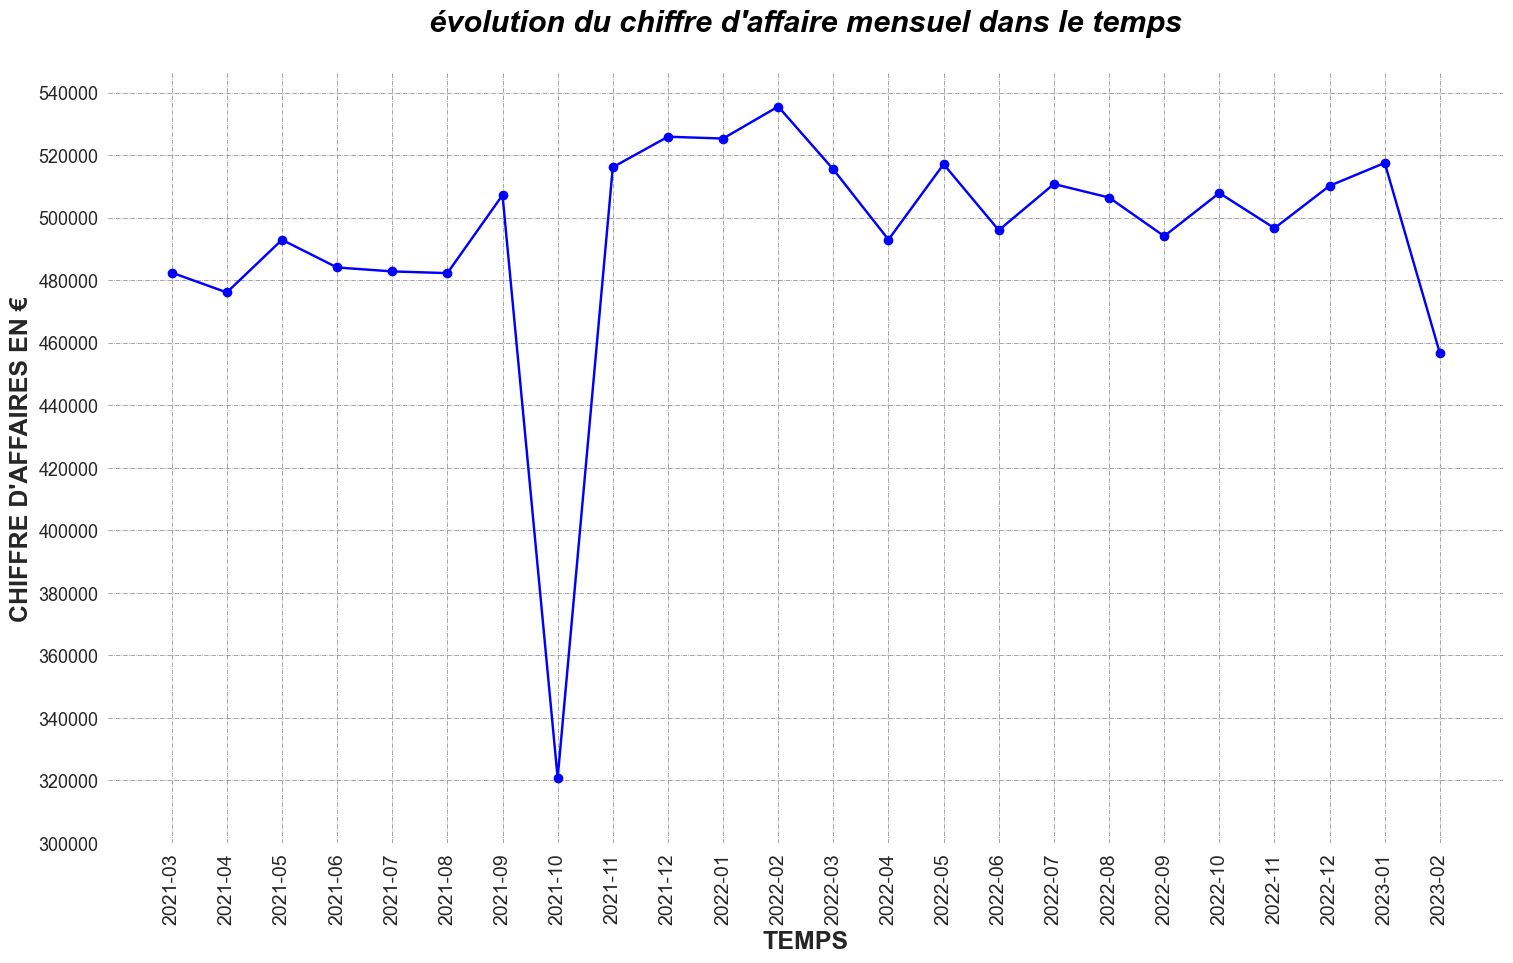

In [135]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize =(18,10))
ax.set_title("évolution du chiffre d'affaire mensuel dans le temps",
fontsize= 22, weight="bold", color= "black", style="italic", loc="center", pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
ax.xaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
plt.plot(ca_mois["mois"], ca_mois["price"].values, c="blue", marker = "o")
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(np.arange(300000,550000,20000),fontsize=13)
plt.ylabel("CHIFFRE D'AFFAIRES EN €", weight ="bold", size = 18)
plt.xlabel("TEMPS", weight="bold", size=18)
plt.show()

#### <span style="color : red">Une forte chute des ventes est à souligner pour Octobre 2021.Je vais consulter les données plus en précision, concernant cette période.</span>

### <span style="color : purple">3.6.7.2 - Evolution du CA journalier  </span>

In [136]:
ca_journalier = customers_profile.groupby(["date"])["price"].sum().reset_index()
ca_journalier

date     price
0   2021-03-01  16565.22
1   2021-03-02  15486.45
2   2021-03-03  15198.69
3   2021-03-04  15196.07
4   2021-03-05  17471.37
..         ...       ...
725 2023-02-24  15207.89
726 2023-02-25  15761.25
727 2023-02-26  16304.72
728 2023-02-27  19170.81
729 2023-02-28  18105.15

[730 rows x 2 columns]

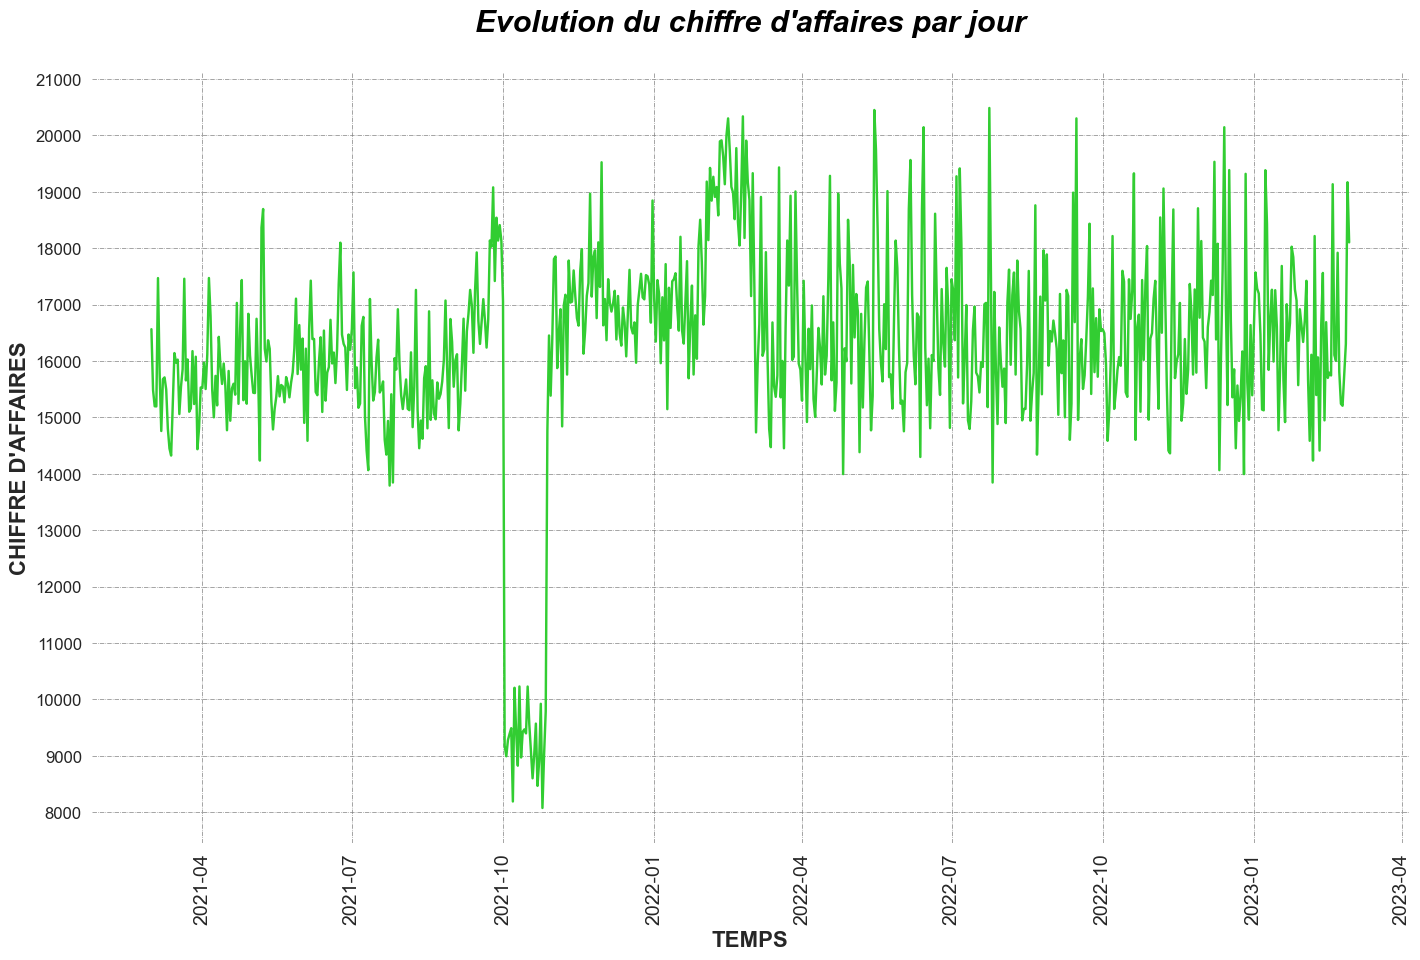

In [137]:
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (17,10))
ax.set_title("Evolution du chiffre d'affaires par jour",
    fontsize = 22, weight = "bold", color= "black", style = "italic", loc= "center", pad = 30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5, color="grey", linestyle = "-.")
ax.xaxis.grid(linewidth=0.5, color="grey", linestyle = "-.")
plt.plot(ca_journalier["date"],ca_journalier["price"].values, c='limegreen')
plt.xticks(rotation=90, fontsize=14)
plt.ylabel("CHIFFRE D'AFFAIRES", weight="bold", size = 16)
plt.xlabel("TEMPS", weight="bold", size=16)
plt.yticks(np.arange(8000,22000,1000),fontsize=12)
plt.show()

### <span style="color : purple">3.6.7.3 - Affinage du C.A pour Octobre 2021, par catégories et par jour  </span>

In [138]:
ca_oct21 = customers_profile.groupby(["date","categ"])["price"].sum().reset_index()
mask_oct21 =(ca_oct21["date"]>="2021-10-1") & (ca_oct21["date"]<="2021-10-31")
ca_oct21 = ca_oct21.loc[mask_oct21]
ca_oct21["date"] = ca_oct21["date"].astype(str)
ca_oct21.head()

date  categ    price
642  2021-10-01      0  6950.50
643  2021-10-01      1  7003.79
644  2021-10-01      2  3104.05
645  2021-10-02      0  7141.01
646  2021-10-02      2  2041.12

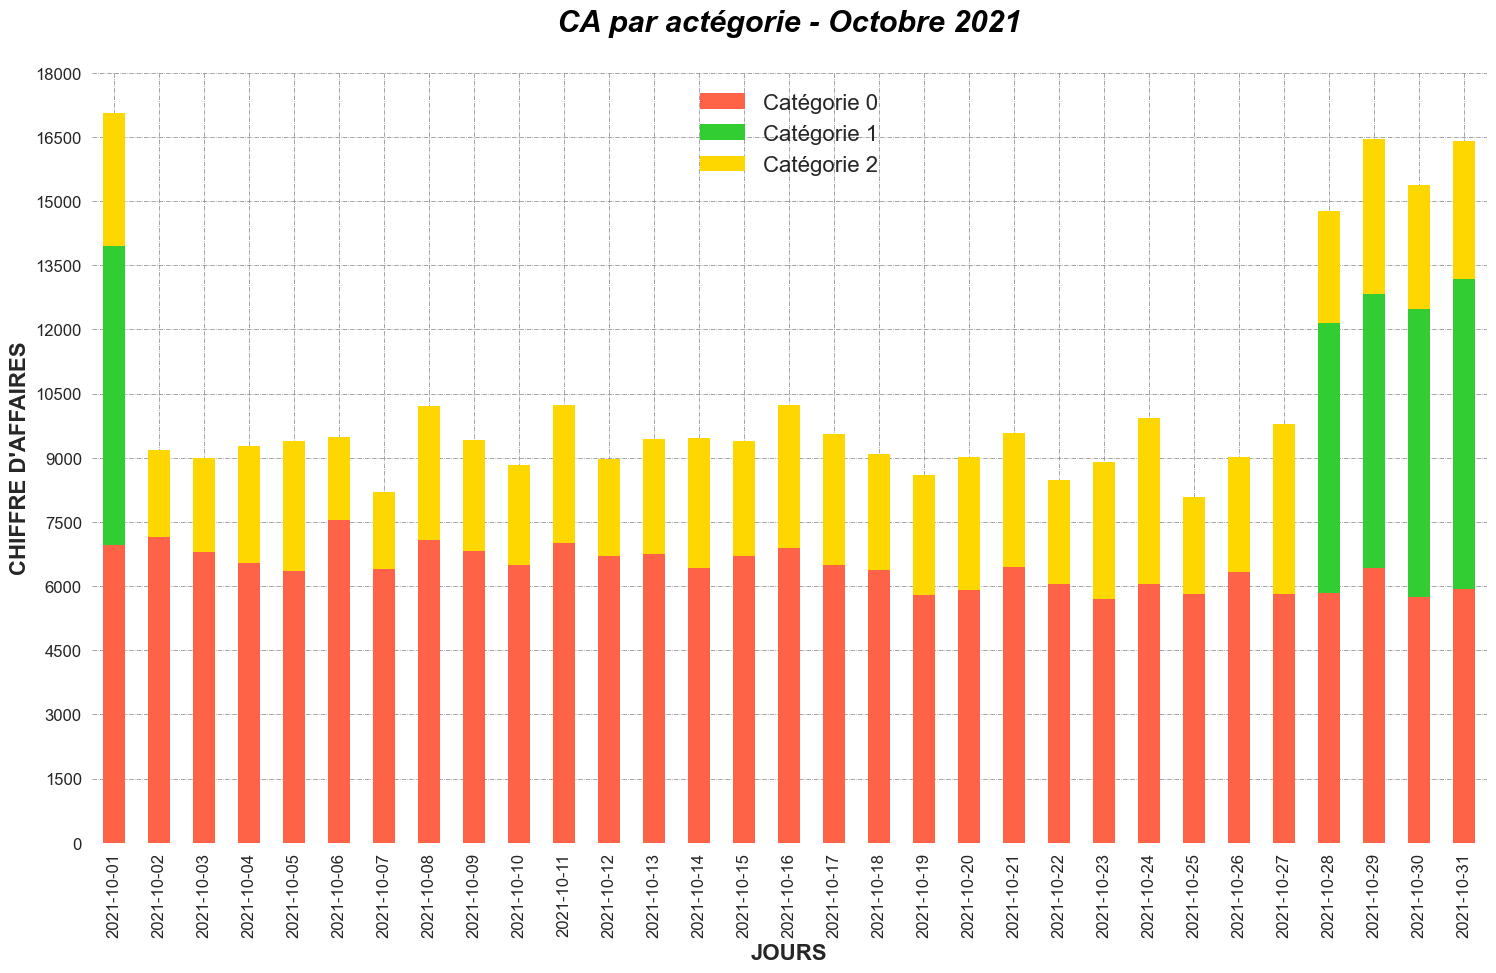

In [139]:
plt.style.use("seaborn")
fig,ax =plt.subplots(figsize=(18,10))
ax.set_title("CA par actégorie - Octobre 2021",
    fontsize=22,weight="bold",color="Black", style="italic",loc="center",pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ca_oct21.groupby(['date','categ']).sum().unstack().plot(kind='bar', 
            y = 'price',  ax=ax, stacked=True, figsize = (18,10), 
            color=['tomato', 'limegreen', 'gold'])
plt.legend(('Catégorie 0', 'Catégorie 1','Catégorie 2'), loc="upper center", fontsize=16)

plt.ylabel("CHIFFRE D'AFFAIRES", weight='bold', size=16)
plt.xlabel("JOURS", weight='bold', size=16)
plt.yticks(np.arange(0, 19000, 1500), fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()

#### <span style="color : red">Comme on peut le remarquer, il n'y a aucune vente de produit de la caégorie 1, entre le 2 et le 27 octobre 2021 inclus. il peut sagir d'une erreur, mais dans tous les cas, cela pose un problème d'altération des données réelles.</span>
#### <span style="color : red">En attendant que la lumière soit faite à propos de ce problème de données, Octobre 2021 ne sera pas pris en compte dans les analyses.</span>

### <span style="color : #8470FF">3.6.8 - Création du df "data", tenant compte de la suppression des données concernant le mois d'Octobre 2021.</span>

In [143]:
data = customers_profile.copy()
data = data.drop(index=data[data["mois"] == "2021-10"].index)
data

id_prod       date session_id client_id   price  categ sex  birth  \
0       0_1518 2022-05-20   s_211425     c_103    4.18      0   f   1986   
1       0_1518 2021-07-20    s_64849     c_103    4.18      0   f   1986   
2       0_1518 2022-08-20   s_255965     c_103    4.18      0   f   1986   
3       0_1418 2022-06-18   s_225411     c_103    8.57      0   f   1986   
4       0_1418 2021-08-18    s_77214     c_103    8.57      0   f   1986   
...        ...        ...        ...       ...     ...    ...  ..    ...   
679106   2_147 2021-07-23    s_65994    c_4391  181.99      2   f   2001   
679107   0_142 2022-03-25   s_184472    c_1232   19.85      0   f   1960   
679108   0_142 2021-09-25    s_95415    c_1232   19.85      0   f   1960   
679109   2_205 2021-03-11     s_4605    c_7534  100.99      2   m   1992   
679110   2_205 2022-07-11   s_236636    c_7534  100.99      2   m   1992   

        year  month  day  age tranche_age     mois  
0       2022      5   20   37    (25, 40]  2022-05  
1       2021      7   20   37    (25, 40]  2021-07  
2       2022      8   20   37    (25, 40]  2022-08  
3       2022      6   18   37    (25, 40]  2022-06  
4       2021      8   18   37    (25, 40]  2021-08  
...      ...    ...  ...  ...         ...      ...  
679106  2021      7   23   22    (18, 25]  2021-07  
679107  2022      3   25   63    (55, 70]  2022-03  
679108  2021      9   25   63    (55, 70]  2021-09  
679109  2021      3   11   31    (25, 40]  2021-03  
679110  2022      7   11   31    (25, 40]  2022-07  

[657512 rows x 14 columns]

### Comptage du nombre total de paniers :

In [144]:
data["session_id"].nunique()

330731

### Comptage du nombre total de livres vendus :

In [145]:
data["id_prod"].count()

657512

### <span style="color : #8470FF">3.6.9 - Observation des 10 clients ayant effectué les plus grosses dépenses.</span>

In [146]:
total_par_client = data.groupby("client_id")[["price"]].sum().sort_values('price', ascending = False).reset_index()
total_par_client.nlargest(10,"price")

client_id      price
0    c_1609  312755.08
1    c_4958  282654.61
2    c_6714  149783.75
3    c_3454  111766.71
4    c_2899    5214.05
5    c_1570    5136.14
6    c_3263    5129.89
7    c_7319    5120.55
8    c_8026    4969.41
9    c_5263    4964.87

#### <span style="color : red">- Parmis le top 10 des plus gros clients, 4 ont dépensé plus de 100.000 €. Il doit certainement sagir de professionnels .</span>
#### <span style="color : red">- Je vais donc faire 2 analyses en parallèle l'une de l'autre : une intégrant la totalité de la clientèle, l'autre en excluant ces 4 clients potentiellement professionnels  .</span>

### <span style="color : #8470FF">3.6.10 - Création des dataframes désignant le type de clientèle.</span>

In [147]:
#liste des "client_id" des clients professionnels:
liste_pro = ["c_1609","c_4958","c_6714","c_3454"]

In [148]:
data["pro"] =data["client_id"].isin(liste_pro).astype(int)
data.head()

id_prod       date session_id client_id  price  categ sex  birth  year  \
0  0_1518 2022-05-20   s_211425     c_103   4.18      0   f   1986  2022   
1  0_1518 2021-07-20    s_64849     c_103   4.18      0   f   1986  2021   
2  0_1518 2022-08-20   s_255965     c_103   4.18      0   f   1986  2022   
3  0_1418 2022-06-18   s_225411     c_103   8.57      0   f   1986  2022   
4  0_1418 2021-08-18    s_77214     c_103   8.57      0   f   1986  2021   

   month  day  age tranche_age     mois  pro  
0      5   20   37    (25, 40]  2022-05    0  
1      7   20   37    (25, 40]  2021-07    0  
2      8   20   37    (25, 40]  2022-08    0  
3      6   18   37    (25, 40]  2022-06    0  
4      8   18   37    (25, 40]  2021-08    0

### <span style="color : purple">3.6.10.1 - Création du dataframe "data_pro" n'incluant que les clients professionnels  </span>

In [149]:
data_pro = data[data["client_id"].isin(liste_pro)]
data_pro.head()

id_prod       date session_id client_id  price  categ sex  birth  year  \
4607  0_1518 2022-04-27   s_200245    c_1609   4.18      0   m   1980  2022   
4608  0_1518 2021-12-20   s_137046    c_1609   4.18      0   m   1980  2021   
4609  0_1518 2023-02-15   s_342011    c_1609   4.18      0   m   1980  2023   
4610  0_1518 2021-05-27    s_40318    c_1609   4.18      0   m   1980  2021   
4612  0_1518 2022-12-05   s_307418    c_1609   4.18      0   m   1980  2022   

      month  day  age tranche_age     mois  pro  
4607      4   27   43    (40, 55]  2022-04    1  
4608     12   20   43    (40, 55]  2021-12    1  
4609      2   15   43    (40, 55]  2023-02    1  
4610      5   27   43    (40, 55]  2021-05    1  
4612     12    5   43    (40, 55]  2022-12    1

In [150]:
data_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45091 entries, 4607 to 103400
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_prod      45091 non-null  object        
 1   date         45091 non-null  datetime64[ns]
 2   session_id   45091 non-null  object        
 3   client_id    45091 non-null  object        
 4   price        45091 non-null  float64       
 5   categ        45091 non-null  int32         
 6   sex          45091 non-null  object        
 7   birth        45091 non-null  int64         
 8   year         45091 non-null  int64         
 9   month        45091 non-null  int64         
 10  day          45091 non-null  int64         
 11  age          45091 non-null  int64         
 12  tranche_age  45091 non-null  category      
 13  mois         45091 non-null  period[M]     
 14  pro          45091 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(1), in

In [151]:
clients_pros = data.groupby("pro")["client_id"]
print(clients_pros.count())

pro
0    612421
1     45091
Name: client_id, dtype: int64


In [152]:
data["pro"].unique()

array([0, 1])

### Vérification du nombre d'id client professionnels:

In [153]:
data_pro["client_id"].nunique()

4

In [154]:
data_pro["client_id"].unique()

array(['c_1609', 'c_6714', 'c_3454', 'c_4958'], dtype=object)

### <span style="color : purple">3.6.10.2 - Création du dataframe "data_part" n'incluant que les clients particuliers  </span>

In [155]:
data_part = data[data["client_id"].isin(liste_pro) == False]
data_part.head()

id_prod       date session_id client_id  price  categ sex  birth  year  \
0  0_1518 2022-05-20   s_211425     c_103   4.18      0   f   1986  2022   
1  0_1518 2021-07-20    s_64849     c_103   4.18      0   f   1986  2021   
2  0_1518 2022-08-20   s_255965     c_103   4.18      0   f   1986  2022   
3  0_1418 2022-06-18   s_225411     c_103   8.57      0   f   1986  2022   
4  0_1418 2021-08-18    s_77214     c_103   8.57      0   f   1986  2021   

   month  day  age tranche_age     mois  pro  
0      5   20   37    (25, 40]  2022-05    0  
1      7   20   37    (25, 40]  2021-07    0  
2      8   20   37    (25, 40]  2022-08    0  
3      6   18   37    (25, 40]  2022-06    0  
4      8   18   37    (25, 40]  2021-08    0

In [156]:
data_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612421 entries, 0 to 679110
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      612421 non-null  object        
 1   date         612421 non-null  datetime64[ns]
 2   session_id   612421 non-null  object        
 3   client_id    612421 non-null  object        
 4   price        612421 non-null  float64       
 5   categ        612421 non-null  int32         
 6   sex          612421 non-null  object        
 7   birth        612421 non-null  int64         
 8   year         612421 non-null  int64         
 9   month        612421 non-null  int64         
 10  day          612421 non-null  int64         
 11  age          612421 non-null  int64         
 12  tranche_age  612421 non-null  category      
 13  mois         612421 non-null  period[M]     
 14  pro          612421 non-null  int32         
dtypes: category(1), datetime64[ns](1),

### Vérification du nombre d'id client particuliers :

In [157]:
data_part["client_id"].nunique()

8594

In [158]:
data["client_id"].nunique()

8598

In [159]:
#profile_part = ProfileReport(data_part, minimal=True)

In [160]:
#profile_part.to_file("profil_dataPart.html")

#### <span style="color : red">- en additionnant le nombre d'id client pros et particuliers, on retrouve bien le nombre d'id client total compris dans le df "data" .</span>

# <span style="color : #FFA500"><u>4 - Questions.</u></span>

## <span style="color : blue">4.1 - Antoine(via Annabelle) -  Analyse des différents indicateurs de vente.</span>

### <span style="color : #8470FF"><u>4.1.1 - Différents indicateurs et graphiques autour du chiffre d'affaires.</u></span>

### <span style="color : purple">4.1.1.1 - Calcul du chiffre d'affaires.</span>

#### <span style="color : green">4.1.1.1.1 - Calcul du chiffre d'affaires total.</span>

In [161]:
ca_total = data["price"].sum()
print("Le chiffre d'affaire total s'élève à ",f"{round(ca_total,2):,}","€")

Le chiffre d'affaire total s'élève à  11,532,929.94 €


#### <span style="color : green">4.1.1.1.2 - Calcul du chiffre d'affaires des clients professionnels.</span>

In [162]:
ca_pro = data_pro["price"].sum()
print("Le chiffre d'affaire des clients professionnels s'élève à ",f"{round(ca_pro,2):,}","€")

Le chiffre d'affaire des clients professionnels s'élève à  856,960.15 €


#### <span style="color : green">4.1.1.1.3 - Calcul du chiffre d'affaires des clients particuliers.</span>

In [163]:
ca_part = data_part["price"].sum()
print("Le chiffre d'affaire des clients particuliers s'élève à ",f"{round(ca_part,2):,}","€")

Le chiffre d'affaire des clients particuliers s'élève à  10,675,969.79 €


In [164]:
nb_pro = data.loc[data["pro"]==0].count()
print(nb_pro.sum())

9186315


#### <span style="color : green">4.1.1.1.4 - Proportion des C.A clients particuliers et professionnels.</span>

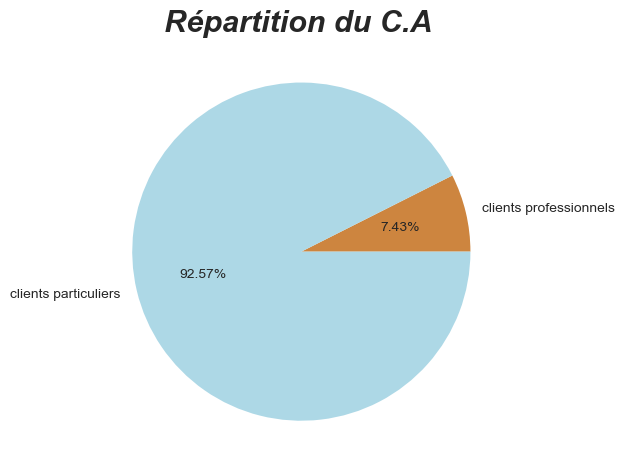

In [165]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(121, aspect="equal")
ax1.set_title("Répartition du C.A ", fontsize=22, weight="bold", loc="center", style="italic")
datas = [ca_pro, ca_part]
labels = ["clients professionnels", "clients particuliers"]
colors = ["peru","lightblue"]
plt.pie(datas, labels=labels, colors=colors, autopct = "%1.2f%%" )
plt.show()

#### <span style="color : green">4.1.1.1.5 - Proportion du nombre de clients particuliers et professionnels.</span>

In [166]:
nb_clients_pros = data_pro.client_id.nunique()
nb_clients_pros

4

In [167]:
nb_clients_part = data_part.client_id.nunique()
nb_clients_part

8594

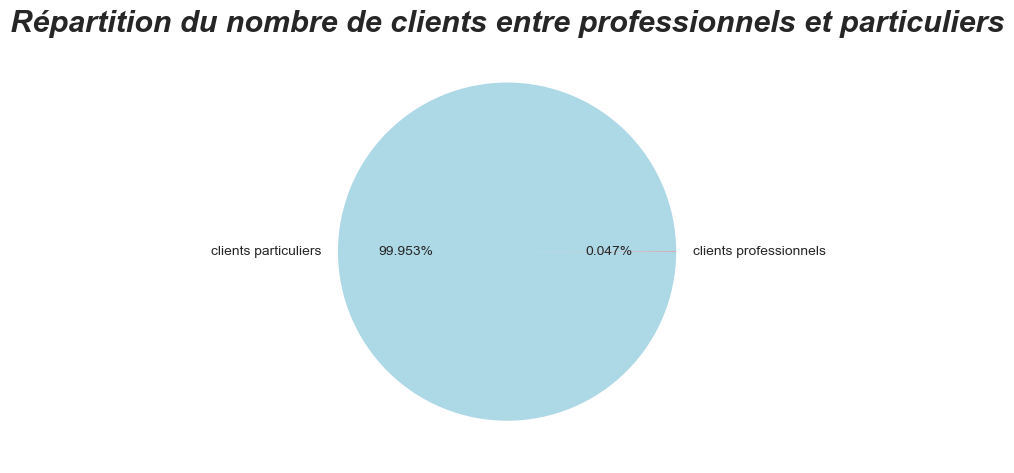

In [168]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(121, aspect="equal")
ax1.set_title("Répartition du nombre de clients entre professionnels et particuliers", fontsize=22, weight="bold", loc="center", style="italic")
datas = [nb_clients_pros, nb_clients_part]
labels = ["clients professionnels", "clients particuliers"]
colors = ["red","lightblue"]
plt.pie(datas, labels=labels, colors=colors, autopct = "%1.3f%%" )
plt.show()

#### <span style="color : green">4.1.1.1.6 - Proportion des ventes aux clients particuliers et professionels.</span>

In [169]:
nb_ventes_pro = data_pro.session_id.count()
nb_ventes_pro

45091

In [170]:
nb_ventes_part = data_part.session_id.count()
nb_ventes_part

612421

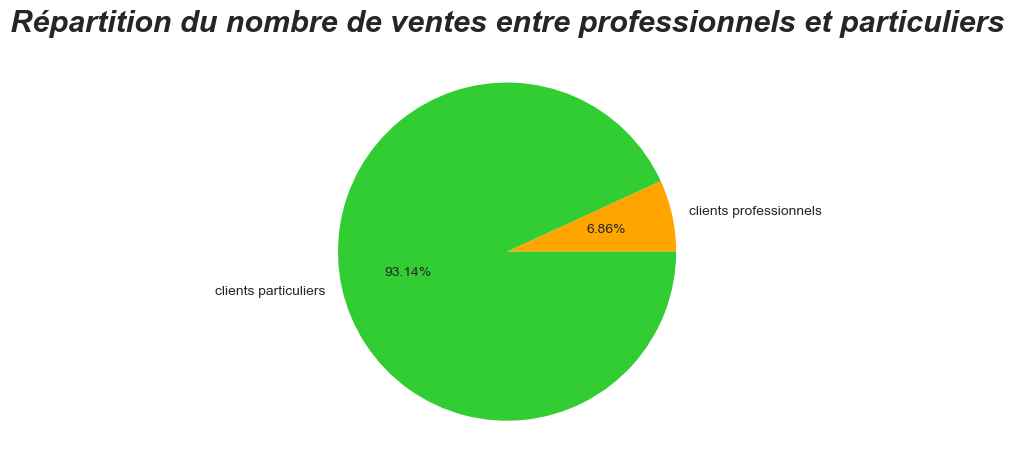

In [171]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(121, aspect="equal")
ax1.set_title("Répartition du nombre de ventes entre professionnels et particuliers", fontsize=22, weight="bold", loc="center", style="italic")
datas = [nb_ventes_pro, nb_ventes_part]
labels = ["clients professionnels", "clients particuliers"]
colors = ["orange","limegreen"]
plt.pie(datas, labels=labels, colors=colors, autopct = "%1.2f%%" )
plt.show()

### <span style="color : #8470FF"><u>4.1.2 - Regarder l'évolution dans le temps.</u></span>

### <span style="color : purple">4.1.2.1 - Pour le C.A total.</span>

In [172]:
ca_mois = data.groupby(["mois"])["price"].sum().reset_index()
ca_mois ["mois"] = ca_mois["mois"].astype(str)
ca_mois.head()

mois      price
0  2021-03  482440.61
1  2021-04  476109.30
2  2021-05  492943.47
3  2021-06  484088.56
4  2021-07  482835.40

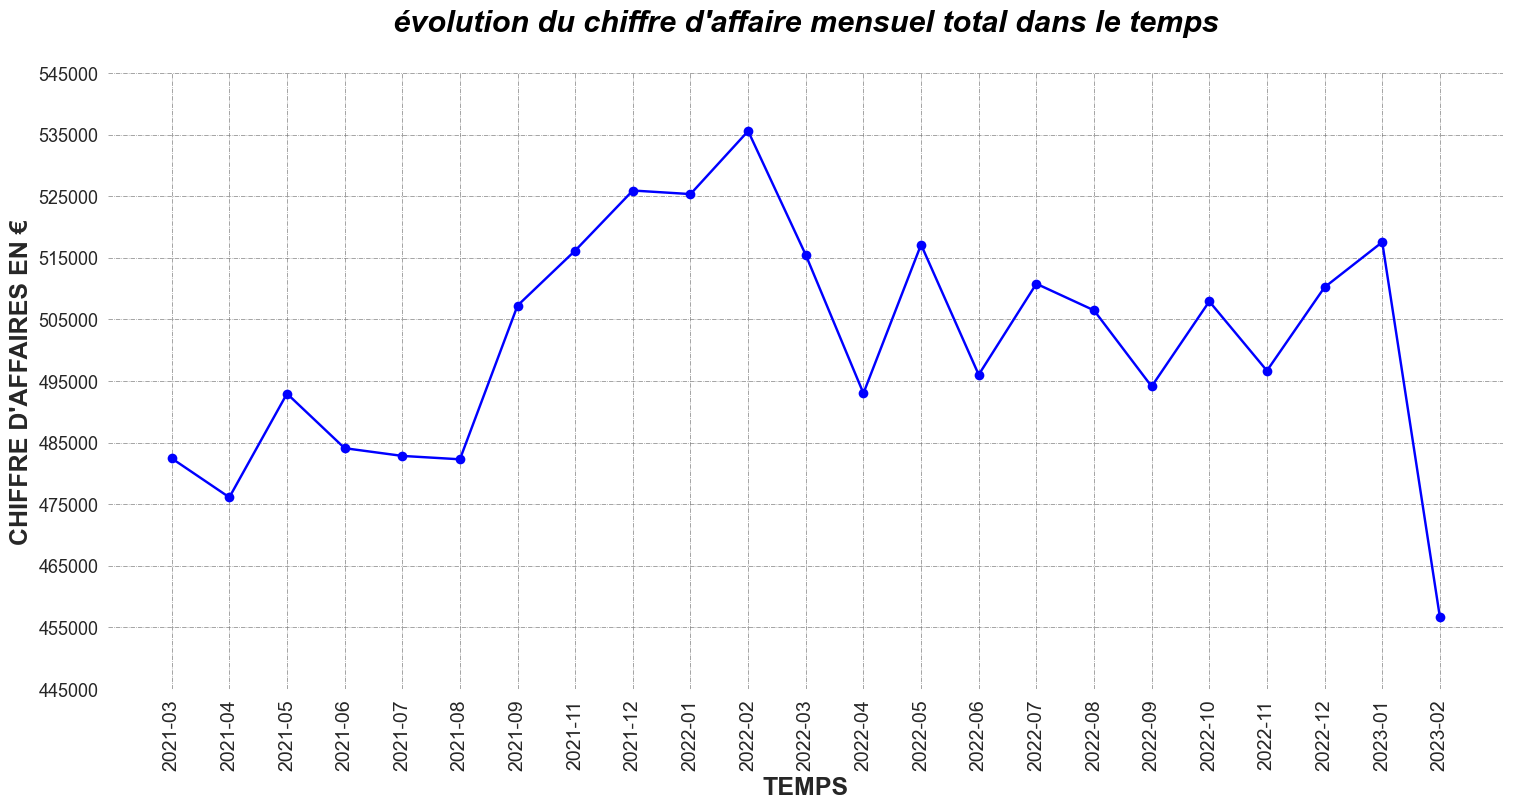

In [173]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize =(18,8))
ax.set_title("évolution du chiffre d'affaire mensuel total dans le temps",
fontsize= 22, weight="bold", color= "black", style="italic", loc="center", pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
ax.xaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
plt.plot(ca_mois["mois"], ca_mois["price"].values, c="blue", marker = "o")
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(np.arange(445000,550000,10000),fontsize=13)
plt.ylabel("CHIFFRE D'AFFAIRES EN €", weight ="bold", size = 18)
plt.xlabel("TEMPS", weight="bold", size=18)
plt.show()

### <span style="color : purple">4.1.2.2 - Pour le C.A des clients professionnels.</span>

In [174]:
ca_mois_pro = data_pro.groupby(["mois"])["price"].sum().reset_index()
ca_mois_pro ["mois"] = ca_mois_pro["mois"].astype(str)
ca_mois_pro.head()

mois     price
0  2021-03  36521.90
1  2021-04  36771.45
2  2021-05  38056.01
3  2021-06  36986.39
4  2021-07  35242.25

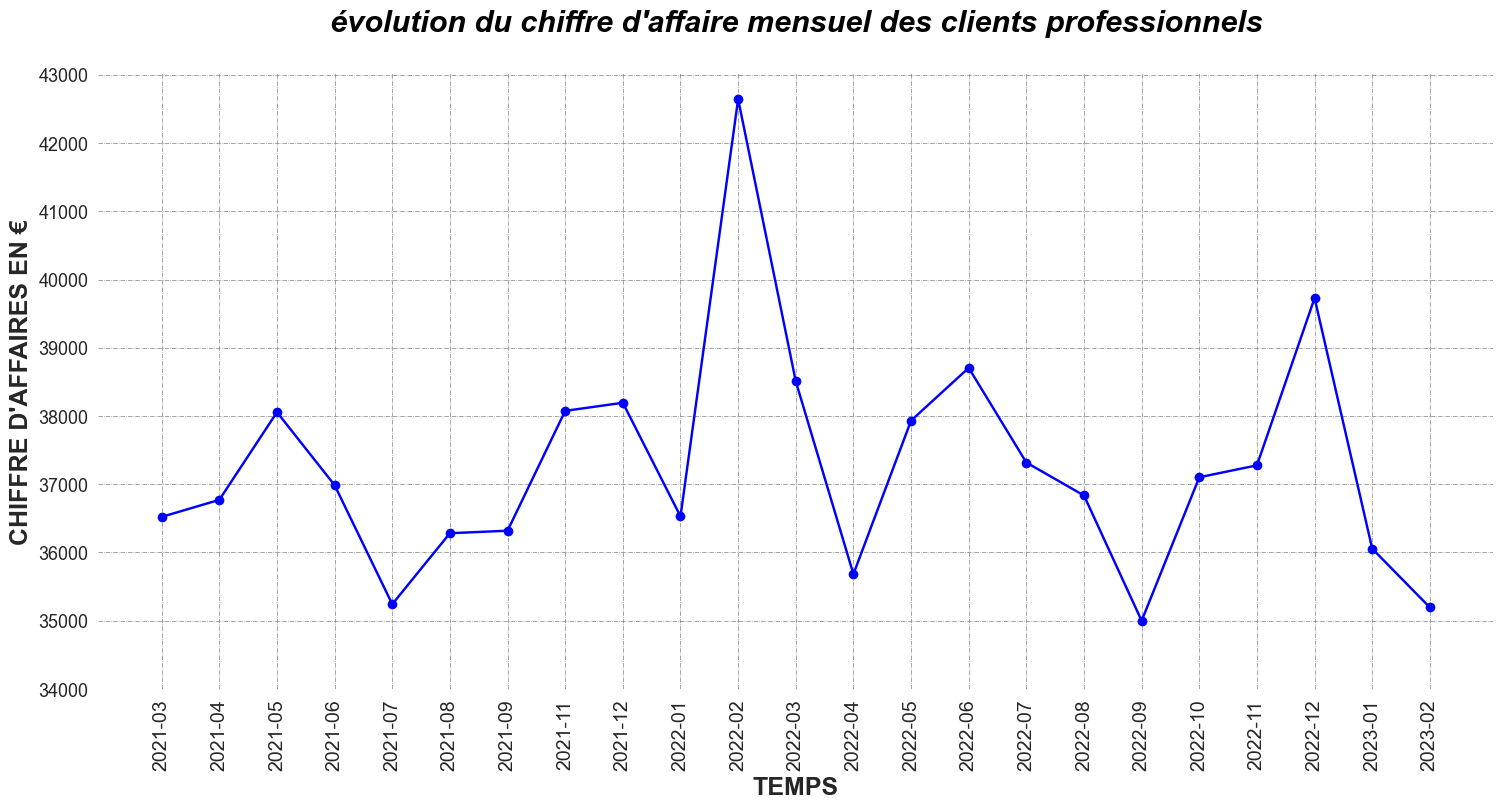

In [175]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize =(18,8))
ax.set_title("évolution du chiffre d'affaire mensuel des clients professionnels",
fontsize= 22, weight="bold", color= "black", style="italic", loc="center", pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
ax.xaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
plt.plot(ca_mois_pro["mois"], ca_mois_pro["price"].values, c="blue", marker = "o")
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(np.arange(34000,44000,1000),fontsize=13)
plt.ylabel("CHIFFRE D'AFFAIRES EN €", weight ="bold", size = 18)
plt.xlabel("TEMPS", weight="bold", size=18)
plt.show()

### <span style="color : purple">4.1.2.3 - Pour le C.A des clients particuliers.</span>

In [176]:
ca_mois_part = data_part.groupby(["mois"])["price"].sum().reset_index()
ca_mois_part ["mois"] = ca_mois_part["mois"].astype(str)
ca_mois_part.head()

mois      price
0  2021-03  445918.71
1  2021-04  439337.85
2  2021-05  454887.46
3  2021-06  447102.17
4  2021-07  447593.15

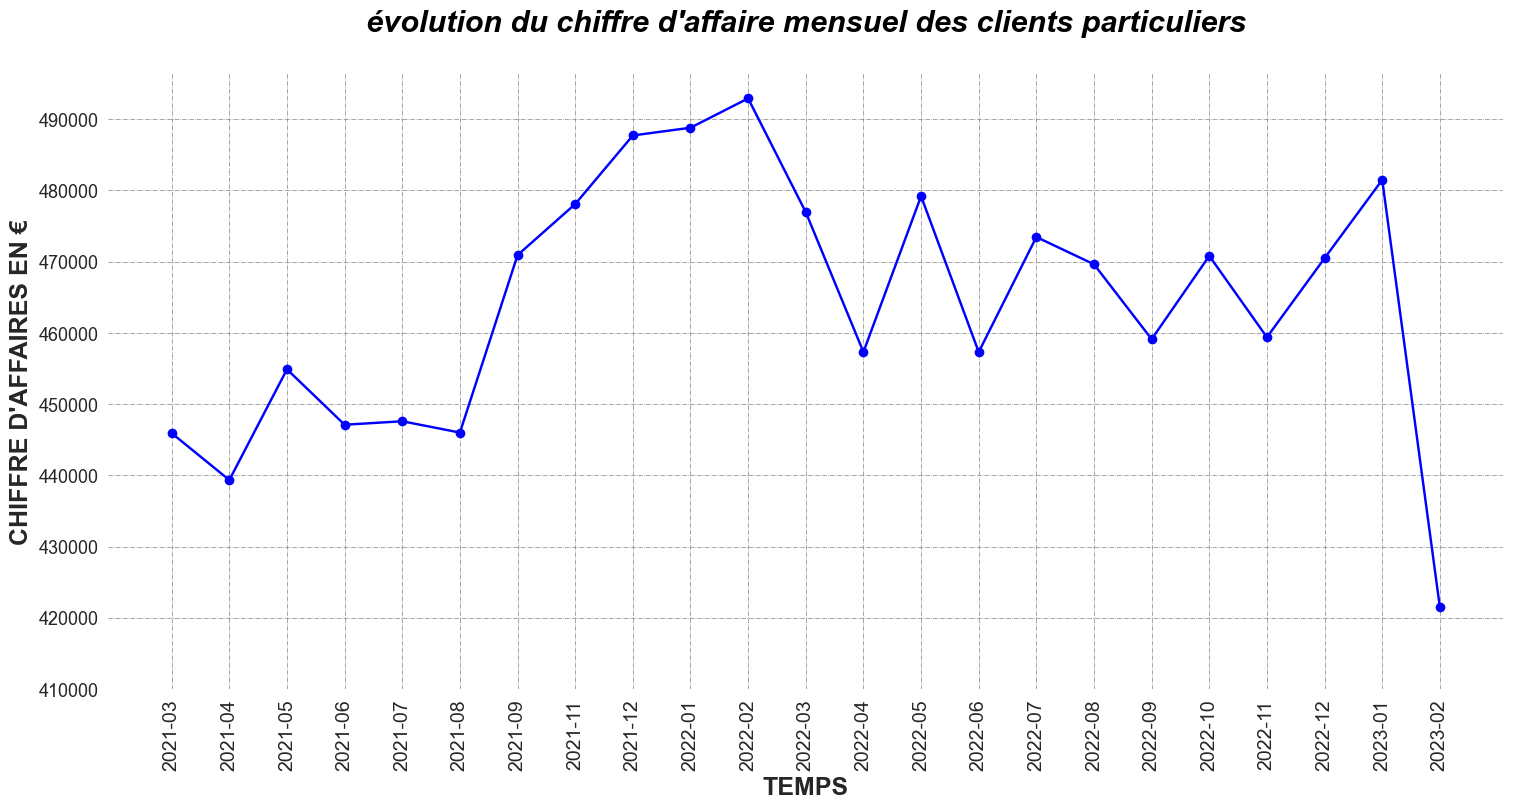

In [177]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize =(18,8))
ax.set_title("évolution du chiffre d'affaire mensuel des clients particuliers",
fontsize= 22, weight="bold", color= "black", style="italic", loc="center", pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
ax.xaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
plt.plot(ca_mois_part["mois"], ca_mois_part["price"].values, c="blue", marker = "o")
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(np.arange(410000,500000,10000),fontsize=13)
plt.ylabel("CHIFFRE D'AFFAIRES EN €", weight ="bold", size = 18)
plt.xlabel("TEMPS", weight="bold", size=18)
plt.show()

### <span style="color : #8470FF"><u>4.1.3 - Mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale.</u></span>

### <span style="color : purple">4.1.3.1 - Pour le C.A total.</span>

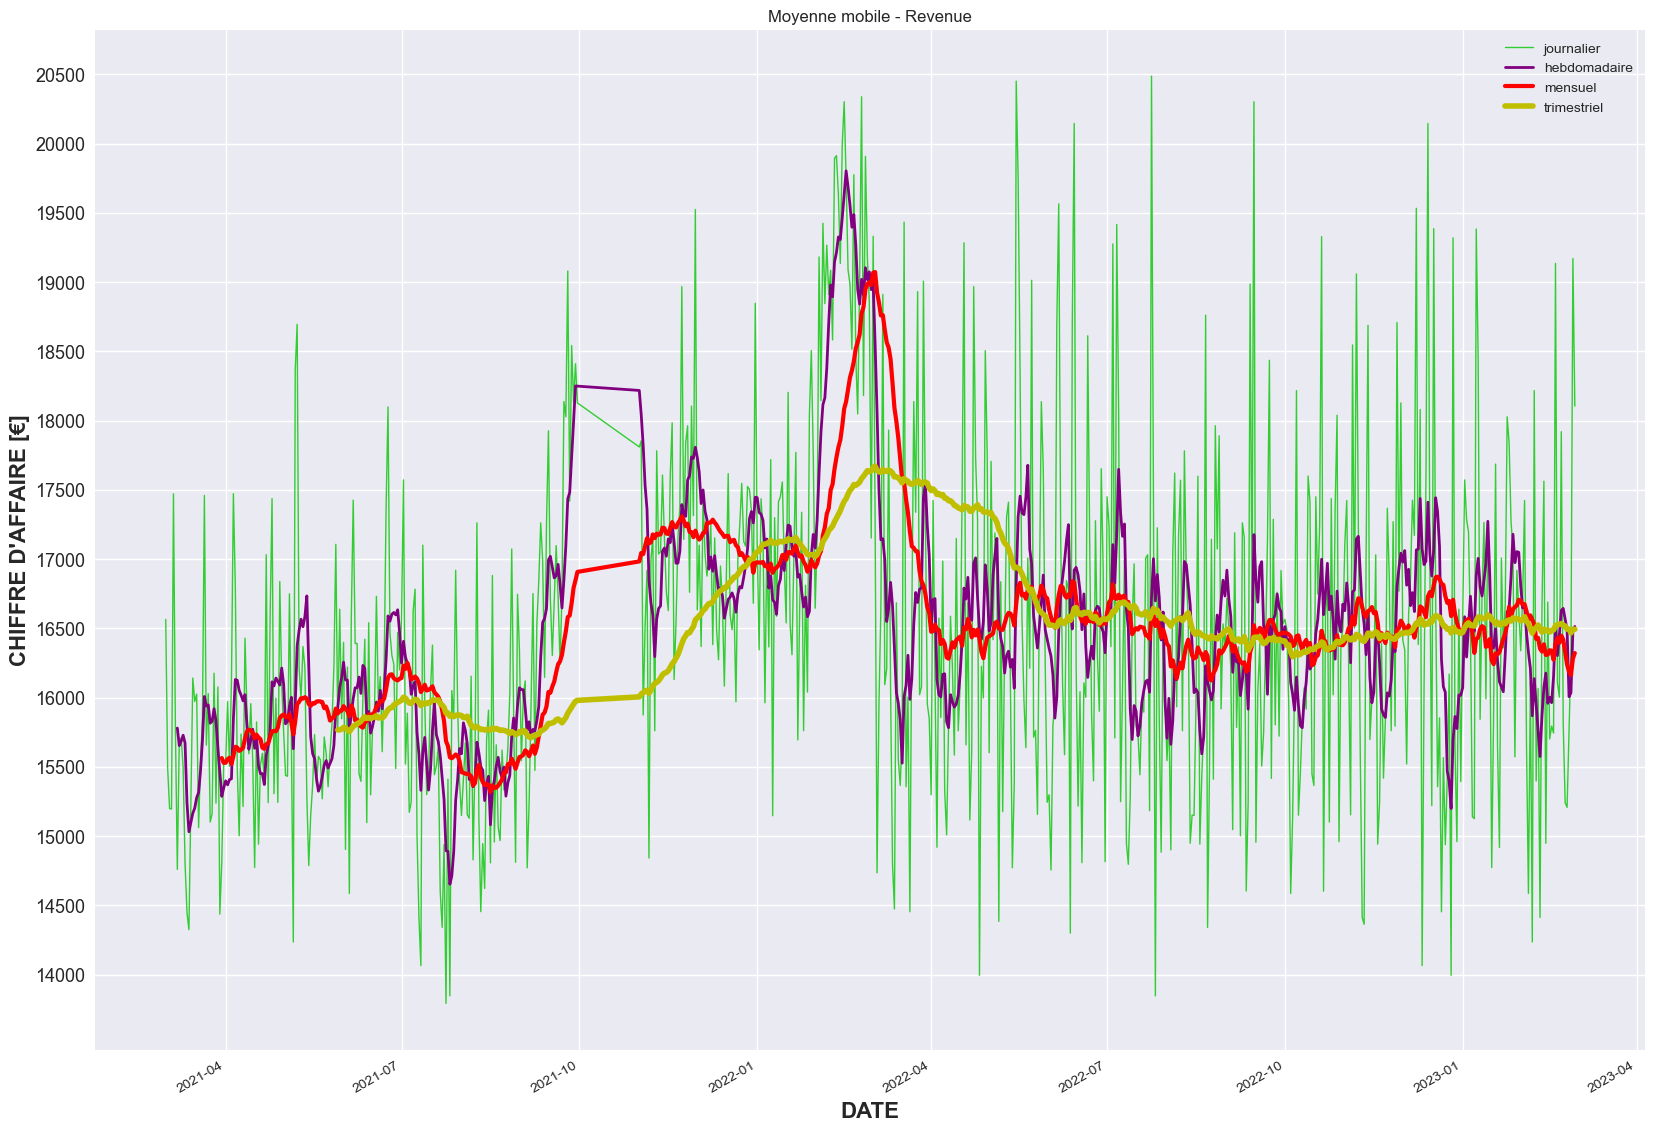

In [178]:
plt.subplots(figsize=[20,15])
data.groupby("date")["price"].sum().plot(linewidth=1, color="limegreen")
data.groupby("date")["price"].sum().rolling(7).mean().plot(linewidth=2, color="purple")
data.groupby("date")["price"].sum().rolling(30).mean().plot(linewidth=3, color="r")
data.groupby("date")["price"].sum().rolling(90).mean().plot(linewidth=4, color="y")

plt.legend(labels=["journalier","hebdomadaire", "mensuel", "trimestriel"],)
plt.title("Moyenne mobile - Revenue")
plt.yticks(np.arange(14000,21000,500),fontsize=13)
plt.xlabel("DATE", fontweight="bold",size=16)
plt.ylabel("CHIFFRE D'AFFAIRE [€]", weight="bold", size=16)
plt.show()

### <span style="color : purple">4.1.3.2 - Pour le C.A des clients professionnels.</span>

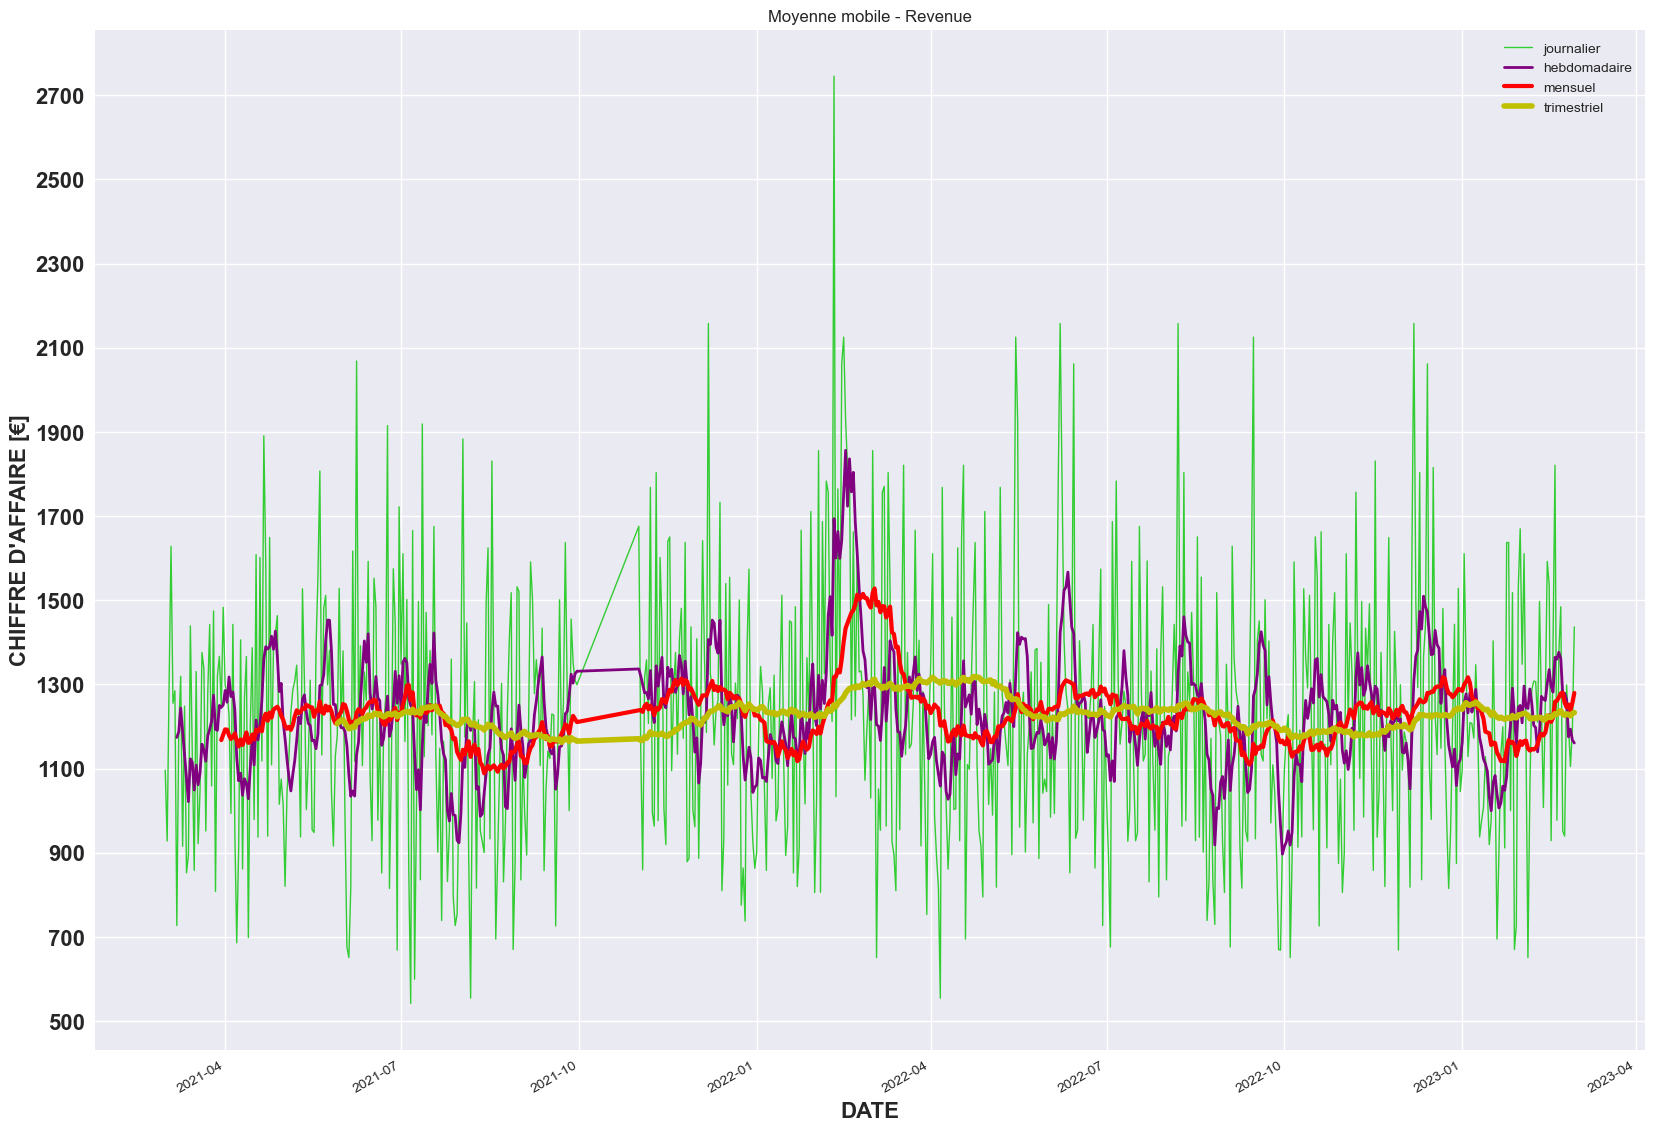

In [179]:
plt.subplots(figsize=[20,15])
data_pro.groupby("date")["price"].sum().plot(linewidth=1, color="limegreen")
data_pro.groupby("date")["price"].sum().rolling(7).mean().plot(linewidth=2, color="purple")
data_pro.groupby("date")["price"].sum().rolling(30).mean().plot(linewidth=3, color="r")
data_pro.groupby("date")["price"].sum().rolling(90).mean().plot(linewidth=4, color="y")

plt.legend(labels=["journalier","hebdomadaire", "mensuel", "trimestriel"],)
plt.title("Moyenne mobile - Revenue")
plt.yticks(np.arange(500,2800,200),fontsize=16, weight="bold")
plt.xlabel("DATE", fontweight="bold",size=16)
plt.ylabel("CHIFFRE D'AFFAIRE [€]", weight="bold", size=16)
plt.show()

### <span style="color : purple">4.1.3.3 - Pour le C.A des clients particuliers.</span>

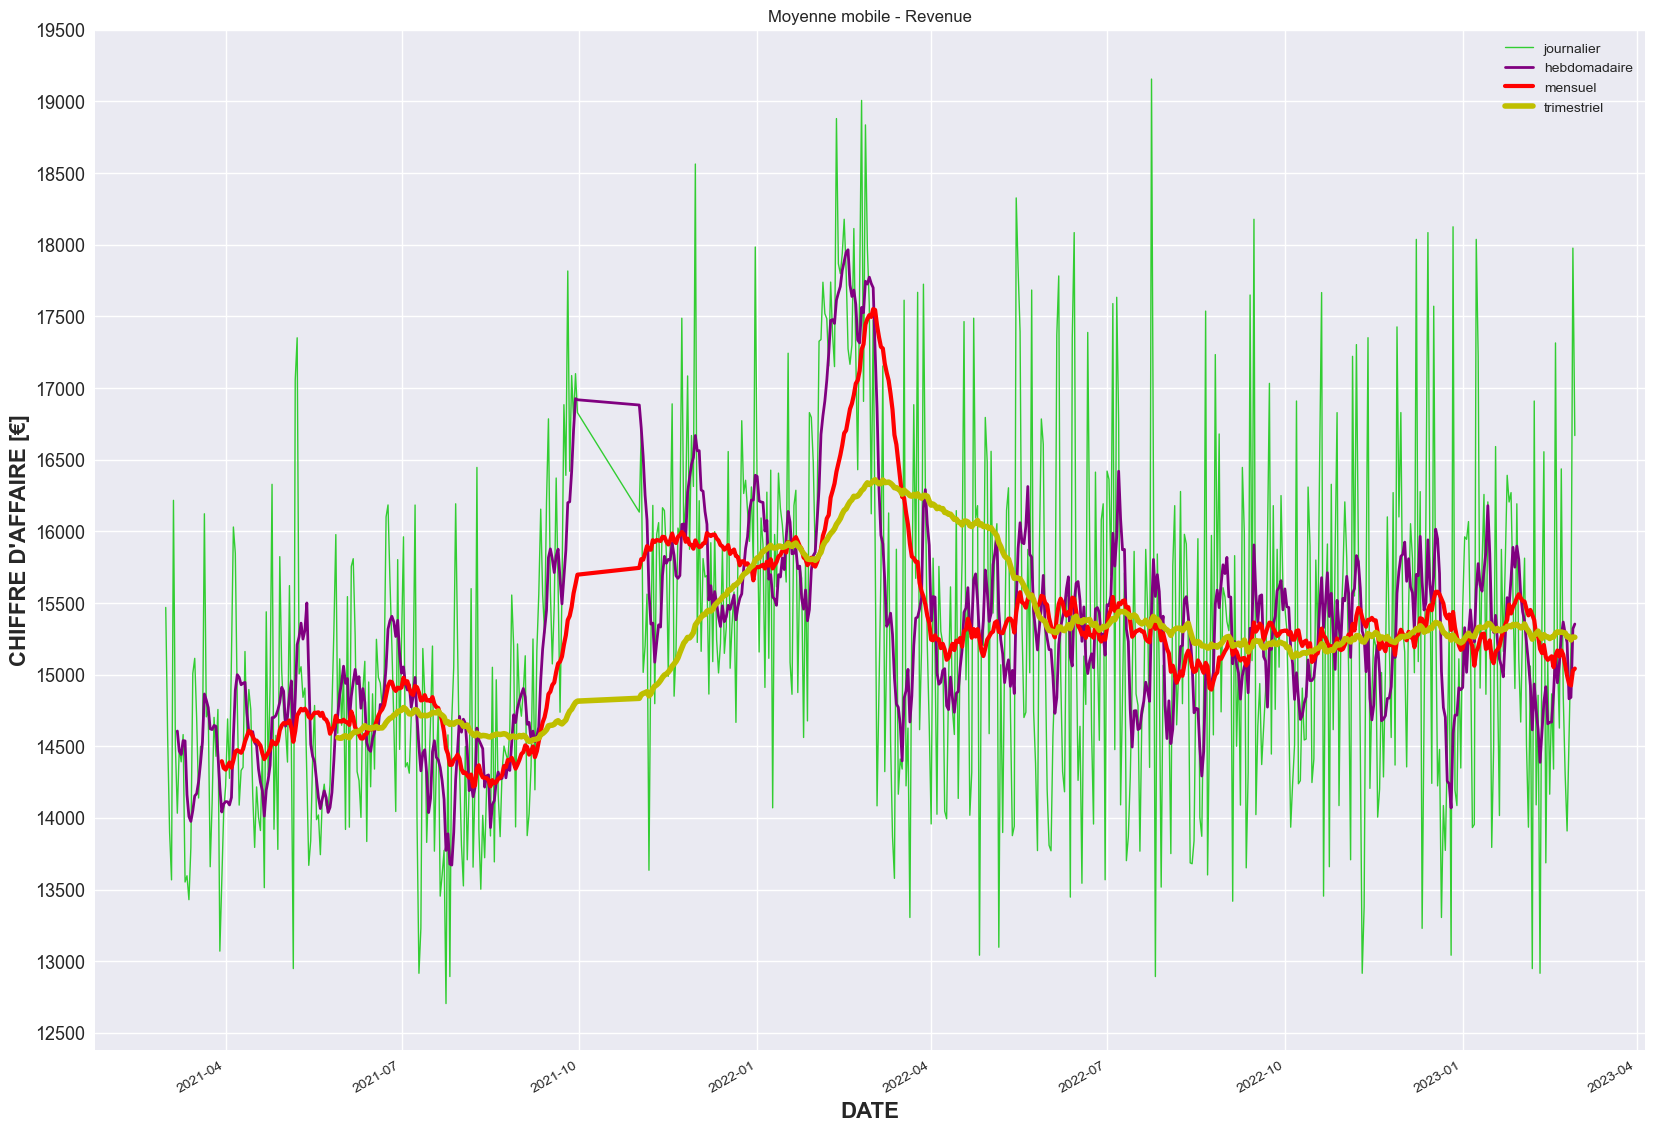

In [180]:
plt.subplots(figsize=[20,15])
data_part.groupby("date")["price"].sum().plot(linewidth=1, color="limegreen")
data_part.groupby("date")["price"].sum().rolling(7).mean().plot(linewidth=2, color="purple")
data_part.groupby("date")["price"].sum().rolling(30).mean().plot(linewidth=3, color="r")
data_part.groupby("date")["price"].sum().rolling(90).mean().plot(linewidth=4, color="y")

plt.legend(labels=["journalier","hebdomadaire", "mensuel", "trimestriel"],)
plt.title("Moyenne mobile - Revenue")
plt.yticks(np.arange(12500,20000,500),fontsize=13)
plt.xlabel("DATE", fontweight="bold",size=16)
plt.ylabel("CHIFFRE D'AFFAIRE [€]", weight="bold", size=16)
plt.show()

### <span style="color : #8470FF"><u>4.1.4 - Voir les tops et les flops.</u></span>

### <span style="color : purple">4.1.4.1 - Produits les plus et les moins vendus par catégorie - ventes totales.</span>

In [181]:
total_ventes = data.groupby(['id_prod','categ']).size().reset_index(name='quantité de produits vendus')
for cat in [0,1,2]:
    print("\n")
    print("Les produits les plus vendus de la catégorie", cat, "est:")
    print(total_ventes.loc[total_ventes['categ'] == cat].sort_values('quantité de produits vendus', ascending=False).head(3))
    print("\n")
    print("Les produits les moins vendus de la catégorie", cat, "est:")
    print(total_ventes.loc[total_ventes['categ'] == cat].sort_values('quantité de produits vendus', ascending=True).head(3))
    print("\n")
    print("La moyenne pour la catégorie", cat, "est de:", round(total_ventes.loc[total_ventes['categ'] == cat]['quantité de produits vendus'].mean(),2))
    print("La médiane pour la catégorie", cat, "est de:", total_ventes.loc[total_ventes['categ'] == cat]['quantité de produits vendus'].median())
    print("Le mode pour la catégorie", cat, "est de:", total_ventes.loc[total_ventes['categ'] == cat]['quantité de produits vendus'].mode())  



Les produits les plus vendus de la catégorie 0 est:
    id_prod  categ  quantité de produits vendus
475  0_1431      0                         1234
465  0_1422      0                         1233
468  0_1425      0                         1215


Les produits les moins vendus de la catégorie 0 est:
     id_prod  categ  quantité de produits vendus
1782   0_541      0                            1
2269   0_980      0                            1
751   0_1683      0                            1


La moyenne pour la catégorie 0 est de: 173.23
La médiane pour la catégorie 0 est de: 48.0
Le mode pour la catégorie 0 est de: 0    9
Name: quantité de produits vendus, dtype: int64


Les produits les plus vendus de la catégorie 1 est:
     id_prod  categ  quantité de produits vendus
2589   1_369      1                         2237
2642   1_417      1                         2173
2639   1_414      1                         2166


Les produits les moins vendus de la catégorie 1 est:
     id_prod  c

### <span style="color : purple">4.1.4.2 - Produits les plus et les moins vendus par catégorie - ventes aux professionnels.</span>

In [182]:
total_ventes_pro = data_pro.groupby(['id_prod','categ']).size().reset_index(name='quantité de produits vendus')
for cat in [0,1,2]:
    print("\n")
    print("Les produits les plus vendus de la catégorie", cat, "aux professionnels est:")
    print(total_ventes_pro.loc[total_ventes_pro['categ'] == cat].sort_values('quantité de produits vendus', ascending=False).head(3))
    print("\n")
    print("Les produits les moins vendus de la catégorie", cat, "aux professionnels est:")
    print(total_ventes_pro.loc[total_ventes_pro['categ'] == cat].sort_values('quantité de produits vendus', ascending=True).head(3))
    print("\n")
    print("La moyenne pour la catégorie", cat, "vendue aux professionnels est de:", round(total_ventes_pro.loc[total_ventes_pro['categ'] == cat]['quantité de produits vendus'].mean(),2))
    print("La médiane pour la catégorie", cat, "vendue aux professionnels est de:", total_ventes_pro.loc[total_ventes_pro['categ'] == cat]['quantité de produits vendus'].median())
    print("Le mode pour la catégorie", cat, "vendue aux professionnels est de:", total_ventes_pro.loc[total_ventes_pro['categ'] == cat]['quantité de produits vendus'].mode()) 



Les produits les plus vendus de la catégorie 0 aux professionnels est:
    id_prod  categ  quantité de produits vendus
385  0_1438      0                          112
360  0_1411      0                          101
327  0_1378      0                           96


Les produits les moins vendus de la catégorie 0 aux professionnels est:
     id_prod  categ  quantité de produits vendus
1275   0_451      0                            1
1406    0_63      0                            1
1167   0_291      0                            1


La moyenne pour la catégorie 0 vendue aux professionnels est de: 17.07
La médiane pour la catégorie 0 vendue aux professionnels est de: 8.0
Le mode pour la catégorie 0 vendue aux professionnels est de: 0    2
Name: quantité de produits vendus, dtype: int64


Les produits les plus vendus de la catégorie 1 aux professionnels est:
     id_prod  categ  quantité de produits vendus
1809   1_403      1                          161
1872   1_498      1                

### <span style="color : purple">4.1.4.3 - Produits les plus et les moins vendus par catégorie - ventes aux particuliers.</span>

In [183]:
total_ventes_part = data_part.groupby(['id_prod','categ']).size().reset_index(name='quantité de produits vendus')
for cat in [0,1,2]:
    print("\n")
    print("Les produits les plus vendus de la catégorie", cat, "aux particuliers est:")
    print(total_ventes_part.loc[total_ventes_part['categ'] == cat].sort_values('quantité de produits vendus', ascending=False).head(3))
    print("\n")
    print("Les produits les moins vendus de la catégorie", cat, "aux particuliers est:")
    print(total_ventes_part.loc[total_ventes_part['categ'] == cat].sort_values('quantité de produits vendus', ascending=True).head(3))
    print("\n")
    print("La moyenne pour la catégorie", cat, "vendue aux particuliers est de:", round(total_ventes_part.loc[total_ventes_part['categ'] == cat]['quantité de produits vendus'].mean(),2))
    print("La médiane pour la catégorie", cat, "vendue aux particuliers est de:", total_ventes_part.loc[total_ventes_part['categ'] == cat]['quantité de produits vendus'].median())
    print("Le mode pour la catégorie", cat, "vendue aux particuliers est de:", total_ventes_part.loc[total_ventes_part['categ'] == cat]['quantité de produits vendus'].mode()) 



Les produits les plus vendus de la catégorie 0 aux particuliers est:
    id_prod  categ  quantité de produits vendus
464  0_1422      0                         1159
467  0_1425      0                         1157
474  0_1431      0                         1150


Les produits les moins vendus de la catégorie 0 aux particuliers est:
     id_prod  categ  quantité de produits vendus
799   0_1728      0                            1
1786   0_549      0                            1
750   0_1683      0                            1


La moyenne pour la catégorie 0 vendue aux particuliers est de: 161.87
La médiane pour la catégorie 0 vendue aux particuliers est de: 45.0
Le mode pour la catégorie 0 vendue aux particuliers est de: 0    4
Name: quantité de produits vendus, dtype: int64


Les produits les plus vendus de la catégorie 1 aux particuliers est:
     id_prod  categ  quantité de produits vendus
2584   1_369      1                         2107
2634   1_414      1                         2

### <span style="color : #8470FF"><u>4.1.5 - Répartition par catégorie.</u></span>

### <span style="color : purple">4.1.5.1 - Répartition des prix par catégorie  </span>

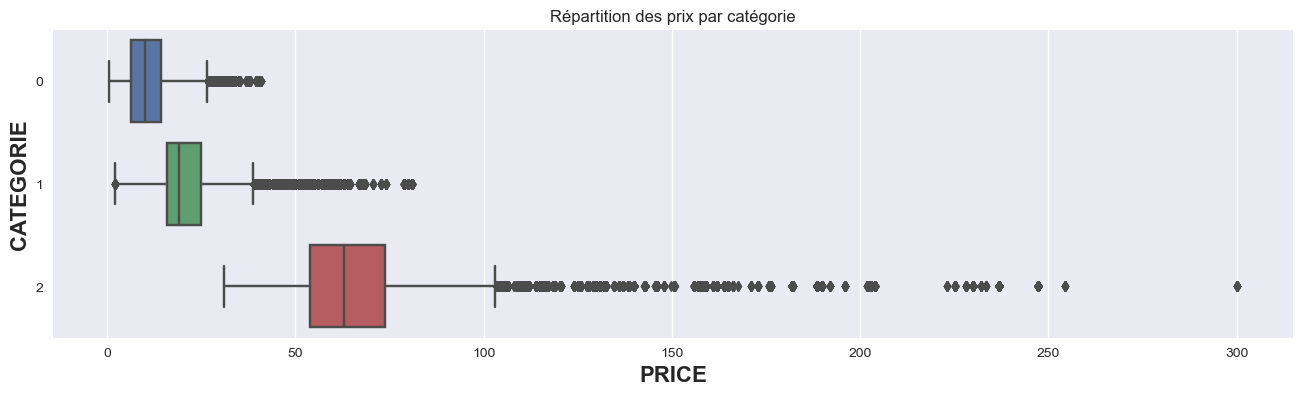

In [184]:
plt.subplots(figsize=[16,4])
sns.boxplot(data=data, x="price", y="categ", orient="h")
plt.title("Répartition des prix par catégorie")
plt.xlabel("PRICE",fontweight="bold", fontsize = 16)
plt.ylabel("CATEGORIE", fontweight = "bold", fontsize = 16)
plt.show()

In [185]:
data.loc[data["categ"]==0].describe()

price     categ          birth           year          month  \
count  396697.000000  396697.0  396697.000000  396697.000000  396697.000000   
mean       10.639052       0.0    1978.097240    2021.682632       6.390827   
std         4.934889       0.0      11.212427       0.616123       3.436980   
min         0.620000       0.0    1929.000000    2021.000000       1.000000   
25%         6.290000       0.0    1973.000000    2021.000000       3.000000   
50%         9.990000       0.0    1980.000000    2022.000000       6.000000   
75%        14.450000       0.0    1986.000000    2022.000000       9.000000   
max        40.990000       0.0    2004.000000    2023.000000      12.000000   

                 day            age            pro  
count  396697.000000  396697.000000  396697.000000  
mean       15.804486      44.902760       0.067641  
std         8.765896      11.212427       0.251129  
min         1.000000      19.000000       0.000000  
25%         8.000000      37.000000       0.000000  
50%        16.000000      43.000000       0.000000  
75%        23.000000      50.000000       0.000000  
max        31.000000      94.000000       1.000000

In [186]:
data.loc[data["categ"]==1].describe()

price     categ          birth           year          month  \
count  225503.000000  225503.0  225503.000000  225503.000000  225503.000000   
mean       20.487357       1.0    1974.349636    2021.707281       6.416478   
std         7.588742       0.0      15.494811       0.613117       3.568888   
min         2.000000       1.0    1929.000000    2021.000000       1.000000   
25%        15.810000       1.0    1964.000000    2021.000000       3.000000   
50%        19.080000       1.0    1975.000000    2022.000000       6.000000   
75%        24.980000       1.0    1986.000000    2022.000000       9.000000   
max        80.990000       1.0    2004.000000    2023.000000      12.000000   

                 day            age            pro  
count  225503.000000  225503.000000  225503.000000  
mean       15.642901      48.650364       0.065303  
std         8.803137      15.494811       0.247060  
min         1.000000      19.000000       0.000000  
25%         8.000000      37.000000       0.000000  
50%        16.000000      48.000000       0.000000  
75%        23.000000      59.000000       0.000000  
max        31.000000      94.000000       1.000000

In [187]:
data.loc[data["categ"]==2].describe()

price    categ         birth          year         month  \
count  35312.000000  35312.0  35312.000000  35312.000000  35312.000000   
mean      76.248568      2.0   1996.058592   2021.709504      6.203302   
std       39.809795      0.0      9.792032      0.618686      3.347361   
min       30.990000      2.0   1929.000000   2021.000000      1.000000   
25%       53.990000      2.0   1994.000000   2021.000000      3.000000   
50%       62.830000      2.0   1999.000000   2022.000000      6.000000   
75%       73.720000      2.0   2002.000000   2022.000000      9.000000   
max      300.000000      2.0   2004.000000   2023.000000     12.000000   

                day           age           pro  
count  35312.000000  35312.000000  35312.000000  
mean      15.812613     26.941408      0.100023  
std        8.838917      9.792032      0.300034  
min        1.000000     19.000000      0.000000  
25%        8.000000     21.000000      0.000000  
50%       16.000000     24.000000      0.000000  
75%       23.000000     29.000000      0.000000  
max       31.000000     94.000000      1.000000

In [188]:
print(round(data["price"].mean(),2))

17.54


### <span style="color : purple">4.1.5.2 - Proportion du C.A par catégorie  </span>

#### <span style="color : green">4.1.5.2.1 - Pour la totalité des ventes.</span>

In [189]:
ca_categ =  data.groupby(["categ"])["price"].sum().reset_index()
ca_categ

categ       price
0      0  4220480.14
1      1  4619960.37
2      2  2692489.43

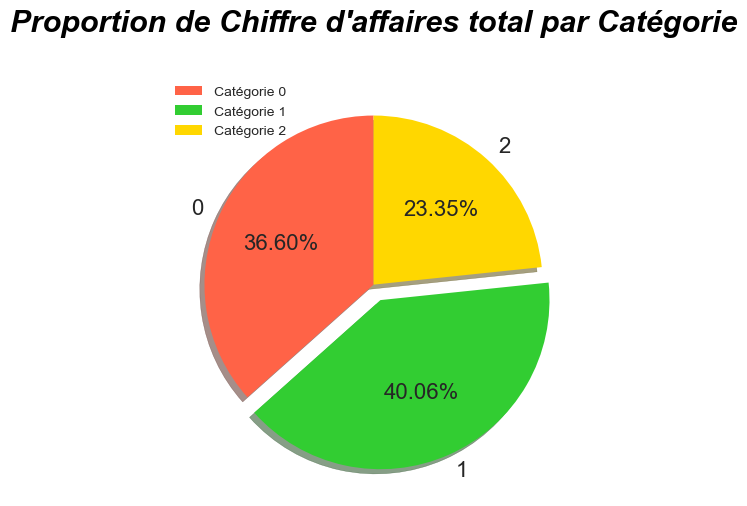

In [190]:
plt.figure(figsize=(12,5.5))
ax1 = plt.subplot(121, aspect='equal')
explode = (0, 0.1, 0)  
ax1.set_title("Proportion de Chiffre d'affaires total par Catégorie",
 fontsize=22, weight='bold',color='Black',style='italic', loc='center',pad=30)
ca_categ.plot(kind='pie', y = 'price', explode=explode, ax=ax1, autopct='%1.2f%%', 
                        startangle=90, shadow=True, labels=(ca_categ['categ']), legend = True,
                        colors = ['tomato', 'limegreen', 'gold'], 
                        fontsize=16)
ax1.set_ylabel('',weight='bold',size=16)
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), loc='upper left', fontsize=10)
plt.show()

#### <span style="color : green">4.1.5.2.1 - Pour les ventes aux professionnels.</span>

In [191]:
ca_categ_pro = data_pro.groupby(["categ"])["price"].sum().reset_index()
ca_categ_pro

categ      price
0      0  286085.30
1      1  302419.39
2      2  268455.46

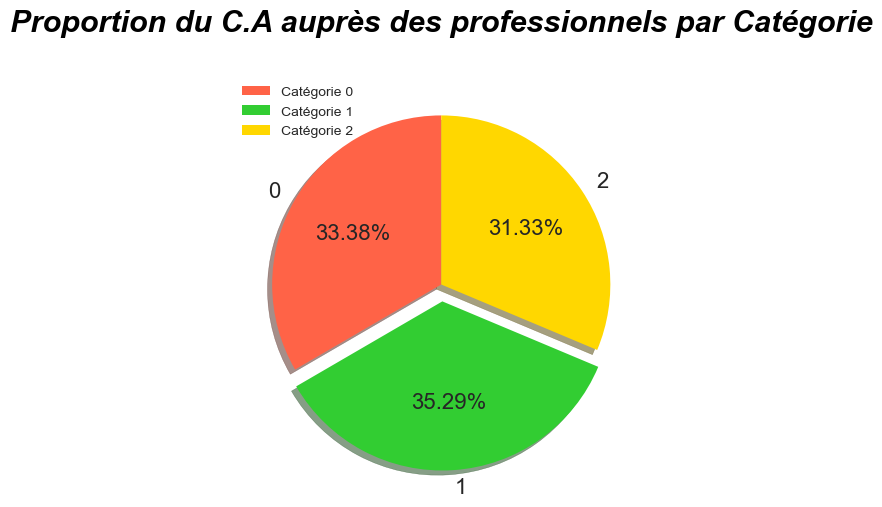

In [192]:
plt.figure(figsize=(12,5.5))
ax1 = plt.subplot(121, aspect='equal')
explode = (0., 0.1, 0)  
ax1.set_title("Proportion du C.A auprès des professionnels par Catégorie",
 fontsize=22, weight='bold',color='Black',style='italic', loc='center',pad=30)
ca_categ_pro.plot(kind='pie', y = 'price', explode=explode, ax=ax1, autopct='%1.2f%%', 
                        startangle=90, shadow=True, labels=(ca_categ_pro['categ']), legend = True,
                        colors = ['tomato', 'limegreen', 'gold'], 
                        fontsize=16)
ax1.set_ylabel('',weight='bold',size=16)
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), loc='upper left', fontsize=10)
plt.show()

#### <span style="color : green">4.1.5.2.2 - Pour les ventes aux particuliers.</span>

In [193]:
ca_categ_part = data_part.groupby(["categ"])["price"].sum().reset_index()
ca_categ_part

categ       price
0      0  3934394.84
1      1  4317540.98
2      2  2424033.97

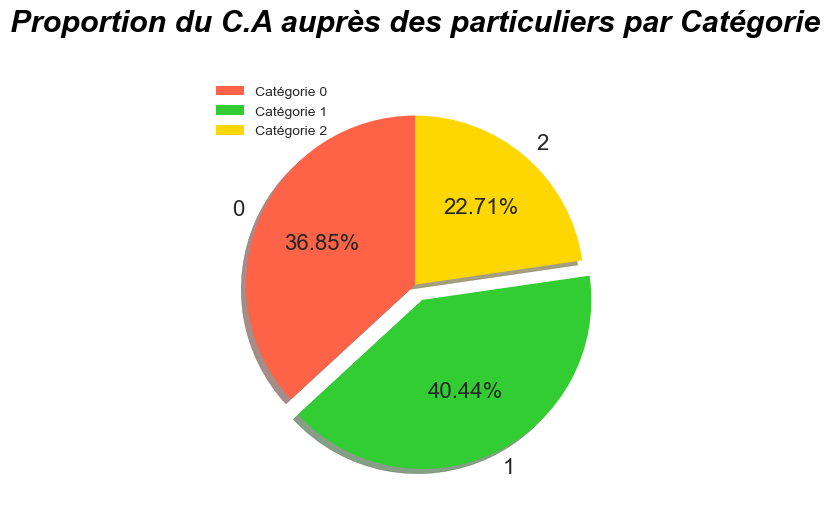

In [194]:
plt.figure(figsize=(12,5.5))
ax1 = plt.subplot(121, aspect='equal')
explode = (0, 0.1, 0)  
ax1.set_title("Proportion du C.A auprès des particuliers par Catégorie",
 fontsize=22, weight='bold',color='Black',style='italic', loc='center',pad=30)
ca_categ_part.plot(kind='pie', y = 'price', explode=explode, ax=ax1, autopct='%1.2f%%', 
                        startangle=90, shadow=True, labels=(ca_categ_part['categ']), legend = True,
                        colors = ['tomato', 'limegreen', 'gold'], 
                        fontsize=16)
ax1.set_ylabel('',weight='bold',size=16)
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), loc='upper left', fontsize=10)
plt.show()

### <span style="color : purple">4.1.5.3 - Proportion du C.A par catégorie dans le temps  </span>

#### <span style="color : green">4.1.5.3.1 - Pour la totalité des ventes.</span>

In [195]:
ca_categ_tps = data.groupby(["mois","categ"])["price"].sum().reset_index()
ca_categ_tps.head()

mois  categ      price
0  2021-03      0  193629.17
1  2021-03      1  186974.17
2  2021-03      2  101837.27
3  2021-04      0  205222.46
4  2021-04      1  156138.35

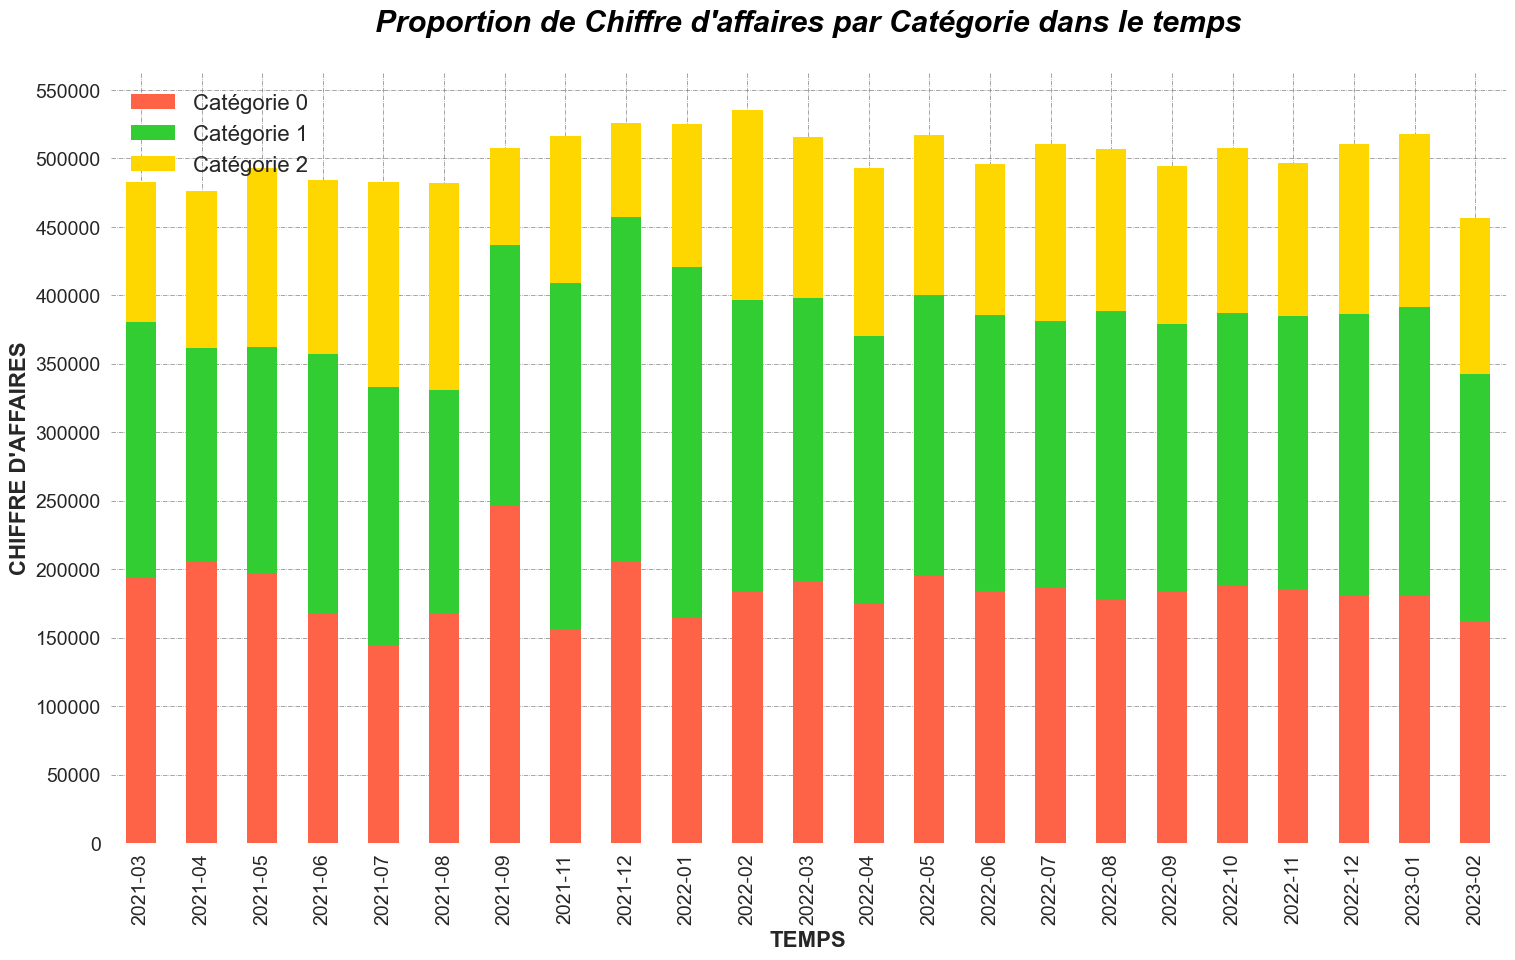

In [196]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Proportion de Chiffre d'affaires par Catégorie dans le temps",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ca_categ_tps.groupby(['mois','categ']).sum().unstack().plot(kind='bar', 
                        y = 'price',  ax=ax, stacked=True, figsize = (18,10), 
                        color=['tomato', 'limegreen', 'gold'])
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), fontsize=16, loc="upper left")
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 600000, 50000), fontsize=14)
plt.show()

#### <span style="color : green">4.1.5.3.2 - Pour les ventes aux professionnels.</span>

In [197]:
ca_categ_tps_pro = data_pro.groupby(["mois","categ"])["price"].sum().reset_index()
ca_categ_tps_pro.head()

mois  categ     price
0  2021-03      0  12991.22
1  2021-03      1  12404.49
2  2021-03      2  11126.19
3  2021-04      0  13764.28
4  2021-04      1  10865.53

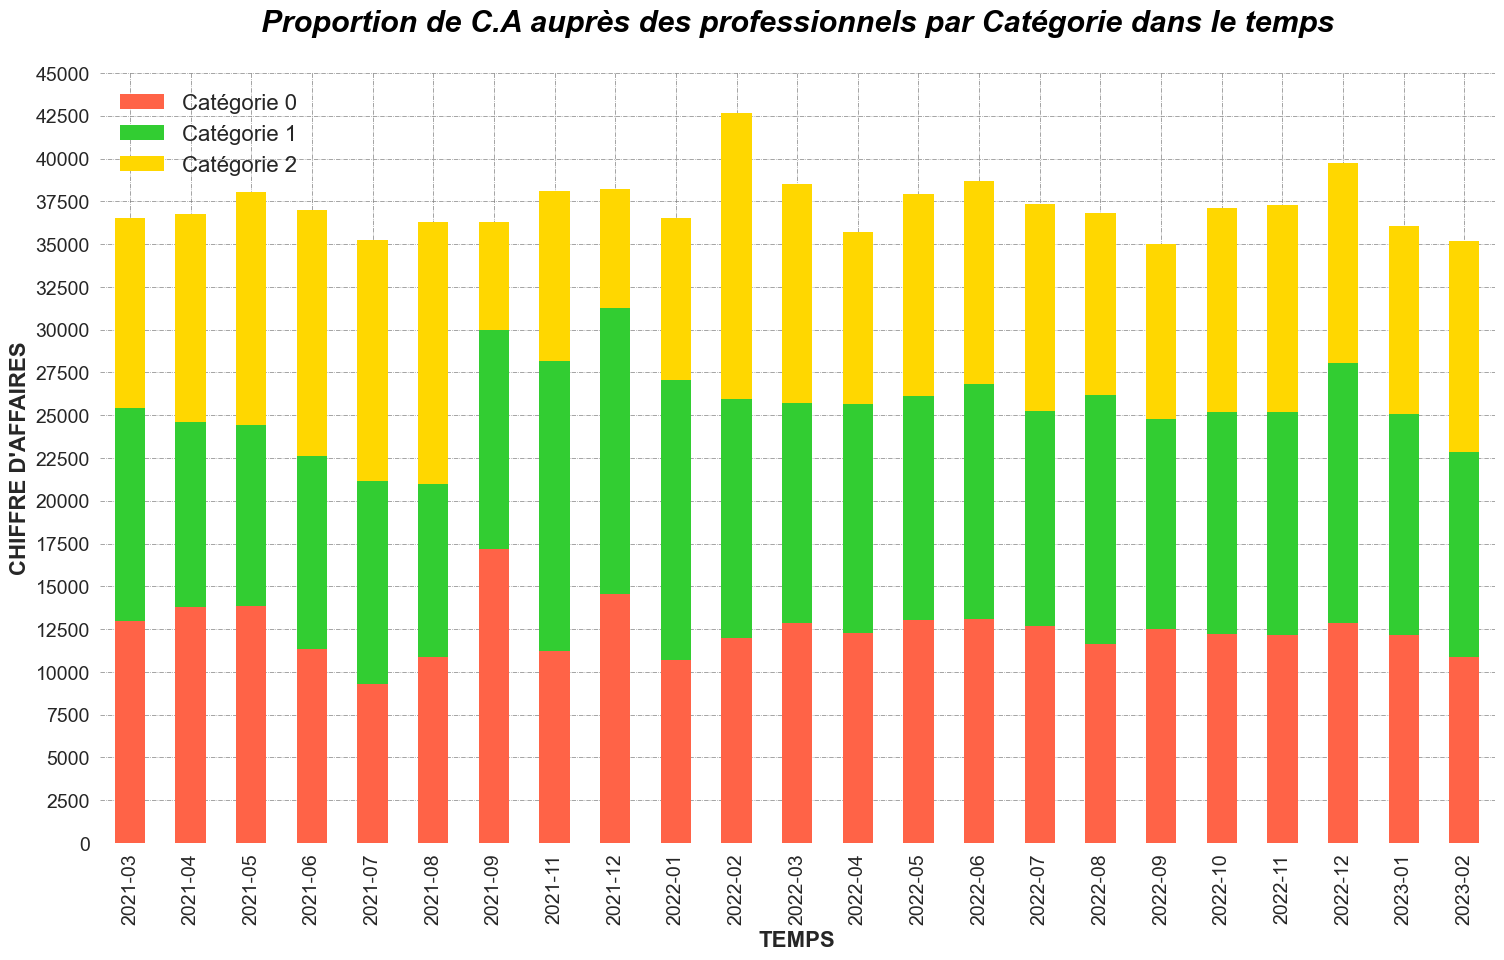

In [198]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Proportion de C.A auprès des professionnels par Catégorie dans le temps",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ca_categ_tps_pro.groupby(['mois','categ']).sum().unstack().plot(kind='bar', 
                        y = 'price',  ax=ax, stacked=True, figsize = (18,10), 
                        color=['tomato', 'limegreen', 'gold'])
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), fontsize=16, loc="upper left")
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 46000, 2500), fontsize=14)
plt.show()

#### <span style="color : green">4.1.5.3.3 - Pour les ventes aux particuliers.</span>

In [199]:
ca_categ_tps_part = data_part.groupby(["mois","categ"])["price"].sum().reset_index()
ca_categ_tps_part.head()

mois  categ      price
0  2021-03      0  180637.95
1  2021-03      1  174569.68
2  2021-03      2   90711.08
3  2021-04      0  191458.18
4  2021-04      1  145272.82

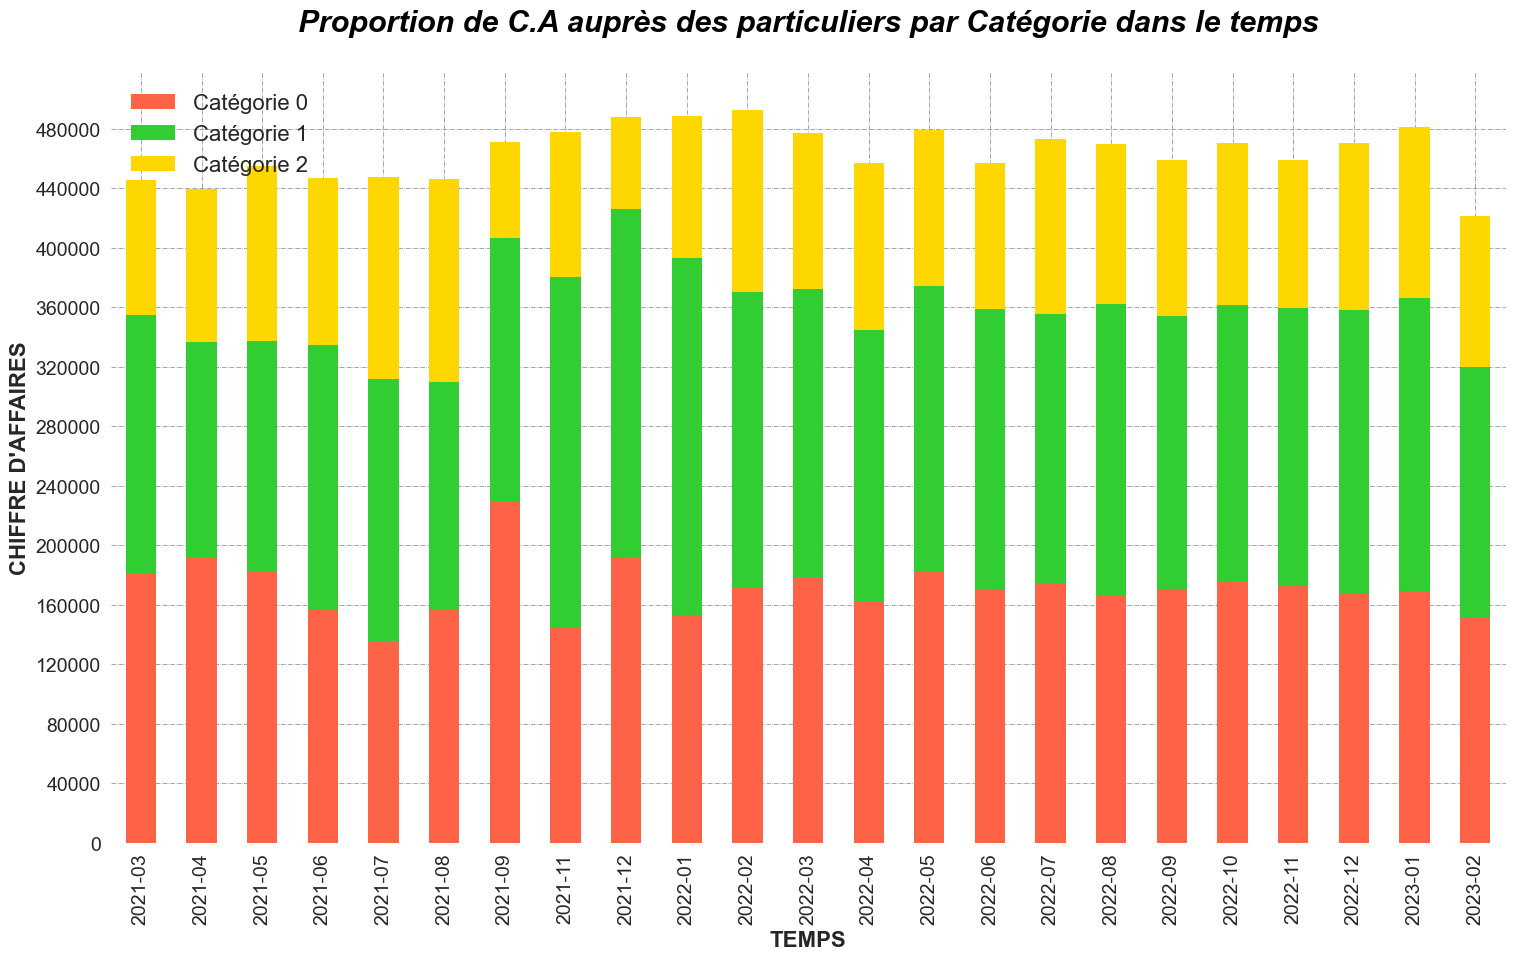

In [200]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Proportion de C.A auprès des particuliers par Catégorie dans le temps",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ca_categ_tps_part.groupby(['mois','categ']).sum().unstack().plot(kind='bar', 
                        y = 'price',  ax=ax, stacked=True, figsize = (18,10), 
                        color=['tomato', 'limegreen', 'gold'])
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), fontsize=16, loc="upper left")
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 520000, 40000), fontsize=14)
plt.show()

### <span style="color : #8470FF"><u>4.1.6 - Comparaisons par genres.</u></span>

#### <span style="color : red">- Les clients professionnels ne comptant que commes personne morales, les genres ne seront comparés qu'à partir des données ne concernant uniquement que les clients particuliers.</span>

### <span style="color : purple">4.1.6.1 - Proportion du C.A par genre.</span>

In [201]:
ca_genre = data_part.groupby(["sex"])["price"].sum().reset_index()
ca_genre

sex       price
0   f  5554610.91
1   m  5121358.88

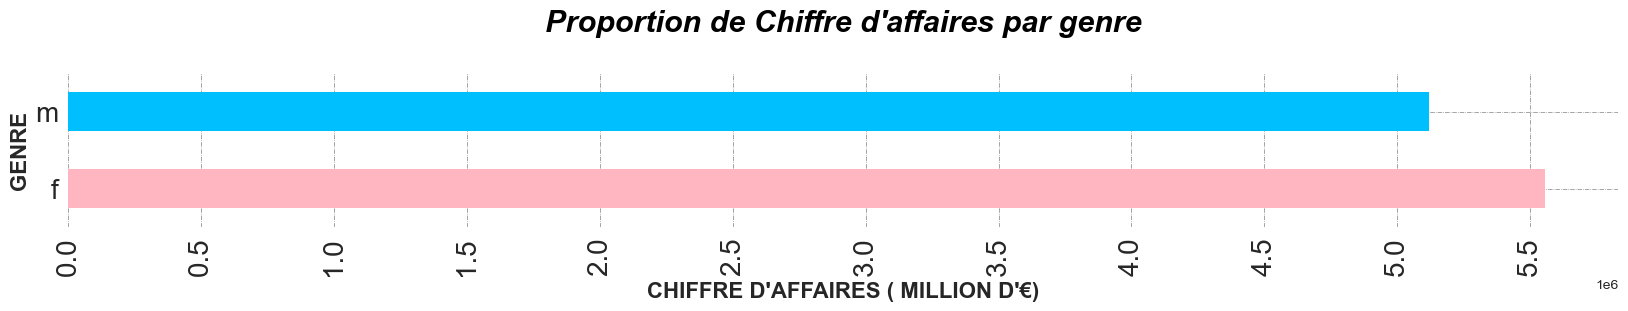

In [202]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par genre",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ca_genre.plot(kind='barh', stacked=True, x = 'sex', legend = False,
                        y = 'price',  ax=ax, figsize = (20,2), 
                        color=['lightpink', 'deepskyblue'])
plt.ylabel("GENRE",weight='bold',size=16)
plt.xlabel("CHIFFRE D'AFFAIRES ( MILLION D'€)",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(0, 5700000, 500000))
plt.show()

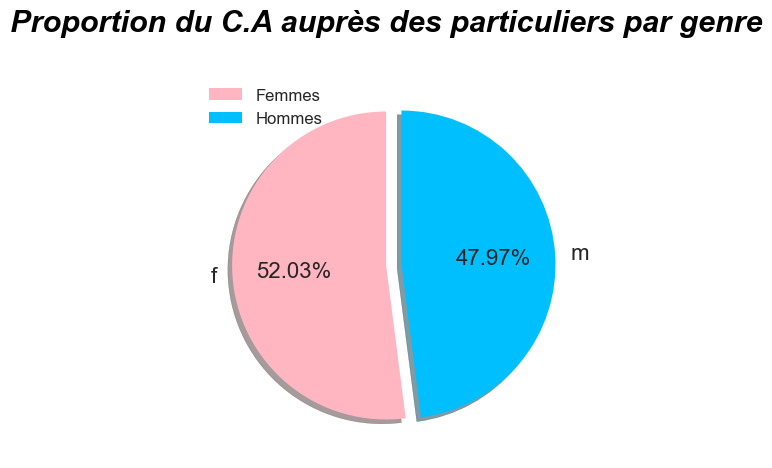

In [203]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, aspect='equal')
explode = (0, 0.1)  
ax1.set_title("Proportion du C.A auprès des particuliers par genre",
 fontsize=22, weight='bold',color='Black',style='italic', loc='center',pad=30)
ca_genre.plot(kind='pie', y = 'price', explode=explode, ax=ax1, autopct='%1.2f%%', 
                        startangle=90, shadow=True, labels=(ca_genre['sex']), legend = True,
                        colors = ['lightpink', 'deepskyblue'], 
                        fontsize=16)
ax1.set_ylabel('',weight='bold',size=16)
plt.legend(('Femmes','Hommes'), loc='upper left', fontsize=12)
plt.show()

#### <span style="color : red">La répartition du chiffre d'affaires montre que la clientèle féminine apporte un C.A supérieur à celui qu'apporte la clientèle masculine, représentant respectivement une part de 52,03% et 47,97%.</span>

### <span style="color : purple">4.1.6.2 - Proportion du C.A par genre dans le temps.</span>

In [204]:
ca_genre_tps =data_part.groupby(["mois","sex"])["price"].sum().reset_index()
ca_genre_tps.head()

mois sex      price
0  2021-03   f  229569.34
1  2021-03   m  216349.37
2  2021-04   f  230830.89
3  2021-04   m  208506.96
4  2021-05   f  240181.71

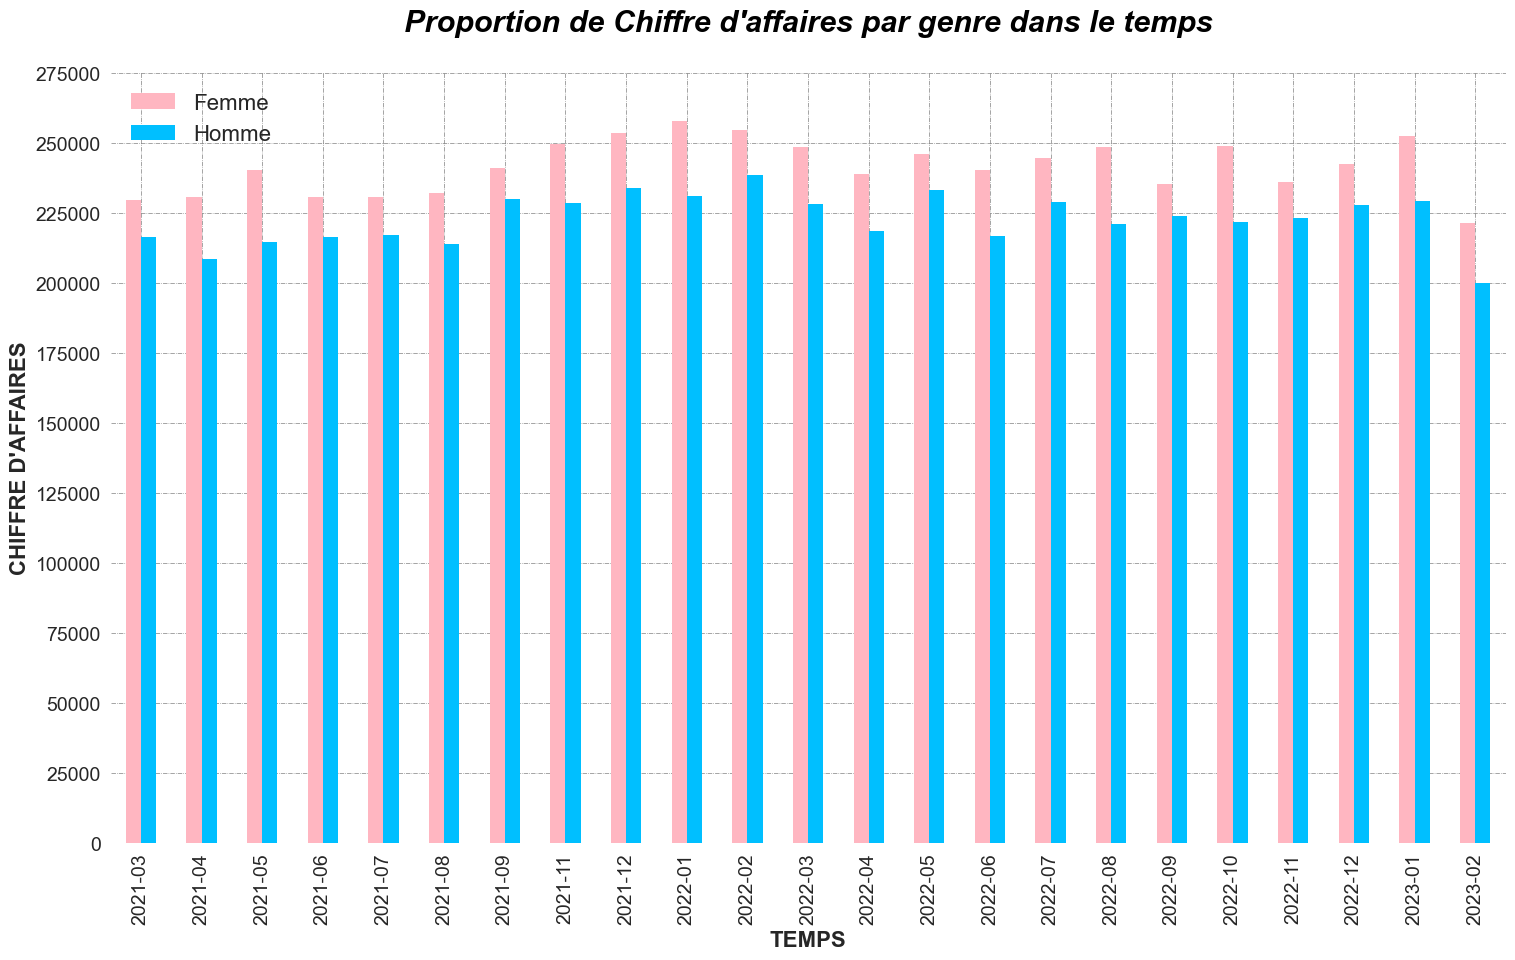

In [205]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par genre dans le temps",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ca_genre_tps.groupby(['mois','sex']).sum().unstack().plot(kind='bar', 
                        y = 'price', ax=ax, figsize = (18,10), 
                        color=['lightpink', 'deepskyblue'])
plt.legend(('Femme','Homme'), loc="upper left", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 280000, 25000), fontsize=14)
plt.show()

#### <span style="color : red">On peut noter une certaine homogénéité des chiffres d'affaire mensuels en fonction du genre de la clientèle , même si l'on note des valeurs légèrement plus hautes, concernant la clientèle masculine, sans pour autant être très significatif.</span>

### <span style="color : #8470FF"><u>4.1.7 - Comparaisons par tranche d'âges.</u></span>

#### <span style="color : red">- Pour les mêmes raisons concernant les genres, les tranches d'âge ne seront comparées qu'à partir des données ne concernant uniquement que les clients particuliers.</span>

### <span style="color : purple">4.1.7.1 - C.A par tranche d'âge.</span>

In [206]:
ca_tranche = data_part.groupby(["tranche_age"])["price"].sum().reset_index(name="C.A")
ca_tranche

tranche_age         C.A
0    (18, 25]  1669237.37
1    (25, 40]  3501513.37
2    (40, 55]  3385494.24
3    (55, 70]  1560224.79
4    (70, 85]   497645.28
5   (85, 100]    61854.74

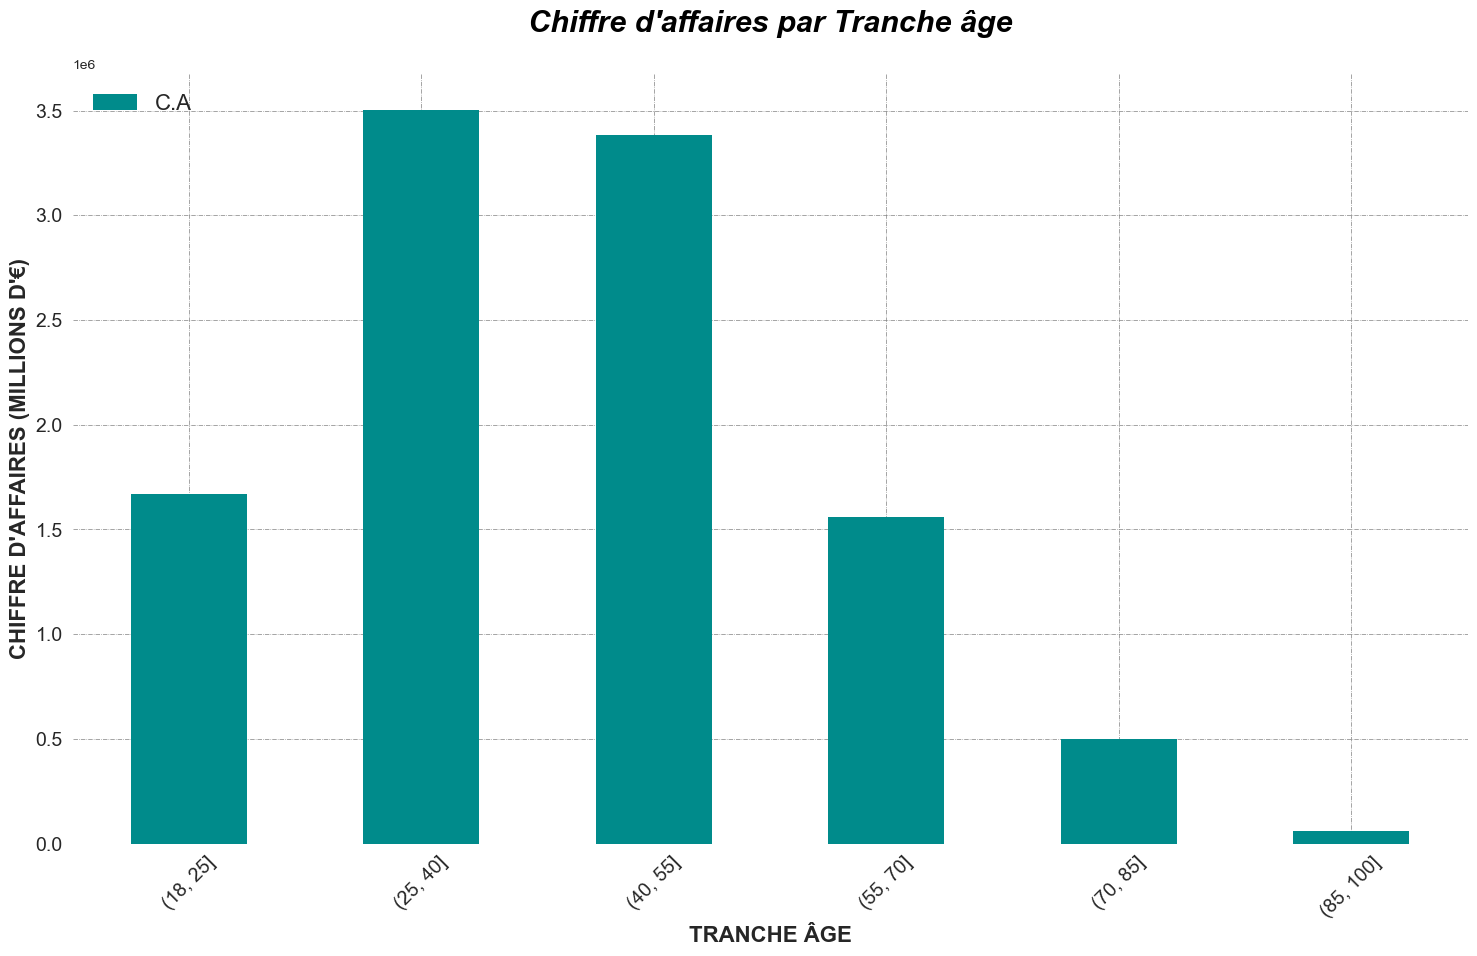

In [207]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Chiffre d'affaires par Tranche âge",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ca_tranche.groupby(['tranche_age']).sum().plot(kind='bar', legend = True,
                        y = "C.A", ax=ax, stacked=True, figsize = (18,10),
                        color=['darkcyan'])
plt.legend(loc="upper left", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES (MILLIONS D'€)",weight='bold', size=16)
plt.xlabel("TRANCHE ÂGE",weight='bold',size=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(np.arange(0, 3800000, 500000), fontsize=14)
plt.show()

### <span style="color : purple">4.1.7.2 - C.A par tranche d'âge / genre.</span>

In [208]:
ca_tranche_genre = data_part.groupby(["tranche_age","sex"])["price"].sum().reset_index(name="C.A")
ca_tranche_genre

tranche_age sex         C.A
0     (18, 25]   f   851342.25
1     (18, 25]   m   817895.12
2     (25, 40]   f  1793054.32
3     (25, 40]   m  1708459.05
4     (40, 55]   f  1795900.58
5     (40, 55]   m  1589593.66
6     (55, 70]   f   790430.23
7     (55, 70]   m   769794.56
8     (70, 85]   f   279378.72
9     (70, 85]   m   218266.56
10   (85, 100]   f    44504.81
11   (85, 100]   m    17349.93

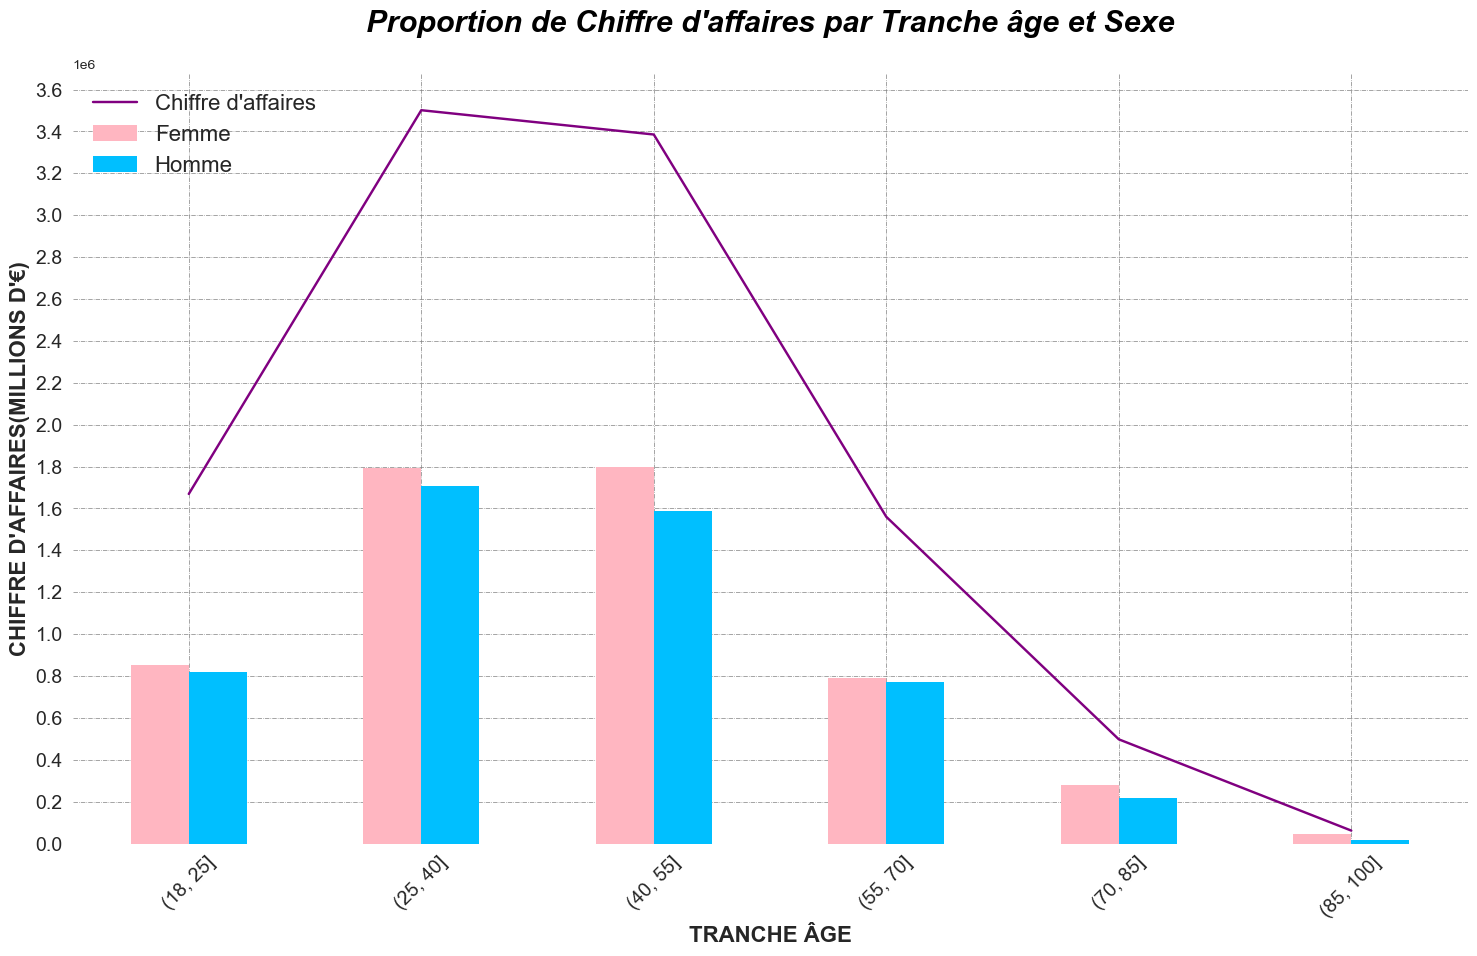

In [209]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par Tranche âge et Sexe",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ca_tranche_genre.groupby(['tranche_age']).sum().unstack().plot(kind='line', 
                        y = "C.A", ax=ax, stacked=True, figsize = (18,10),
                        color=['purple']).get_xaxis().set_visible(False)

ca_tranche_genre.groupby(['tranche_age','sex']).sum().unstack().plot(kind='bar', 
                        y = "C.A",  ax=ax, figsize = (18,10), 
                        color=['lightpink', 'deepskyblue']).get_xaxis().set_visible(True)

plt.legend(("Chiffre d'affaires", 'Femme','Homme'), loc="upper left", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES(MILLIONS D'€)",weight='bold',size=16)
plt.xlabel("TRANCHE ÂGE",weight='bold',size=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(np.arange(0, 3800000, 200000), fontsize=14)
plt.show()

### <span style="color : #8470FF"><u>4.1.8 - Informations sur les profils clients.</u></span>

### <span style="color : purple">4.1.8.1 - Répartition Hommes / Femmes</span>

In [210]:
genre_client_femme = data_part.loc[data_part["sex"]=="f"]["client_id"].nunique()
genre_client_femme

4476

In [211]:
genre_client_homme = data_part.loc[data_part["sex"]=="m"]["client_id"].nunique()
genre_client_homme

4118

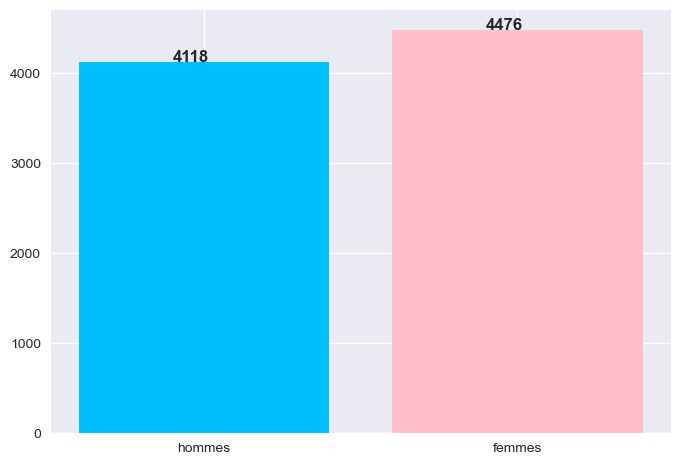

In [212]:
height = genre_client_homme, genre_client_femme
bars = ("hommes", "femmes")
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, color=("deepskyblue", "pink"))
for i, v in enumerate(height):
    plt.text(x= i-0.1, y= v+1, s=str(v), size=12, weight="bold")
plt.xticks(x_pos, bars)
plt.show()

In [213]:
nb_genre_client = data_part.groupby(["sex"])["client_id"].nunique().reset_index(name="nb_genre")

nb_genre_client

sex  nb_genre
0   f      4476
1   m      4118

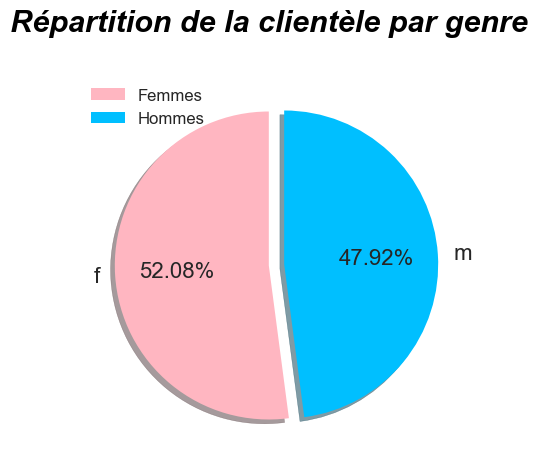

In [214]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, aspect='equal')
explode = (0, 0.1)  
ax1.set_title("Répartition de la clientèle par genre",
 fontsize=22, weight='bold',color='Black',style='italic', loc='center',pad=30)
nb_genre_client.plot(kind='pie', y = 'nb_genre', explode=explode, ax=ax1, autopct='%1.2f%%', 
                        startangle=90, shadow=True, labels=(nb_genre_client['sex']), legend = True,
                        colors = ['lightpink', 'deepskyblue'], 
                        fontsize=16)
ax1.set_ylabel('',weight='bold',size=16)
plt.legend(('Femmes','Hommes'), loc='upper left', fontsize=12)
plt.show()

### <span style="color : purple">4.1.8.2 - Répartition des ventes par genre</span>

In [215]:
nb_genre_ventes = data_part.groupby(["sex"])["session_id"].nunique().reset_index(name="nb_ventes_genre")

nb_genre_ventes

sex  nb_ventes_genre
0   f           161288
1   m           147189

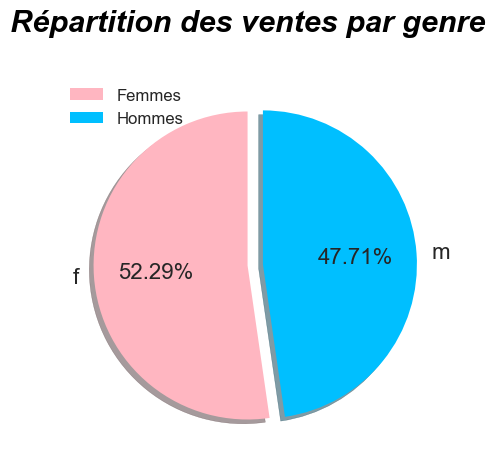

In [216]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, aspect='equal')
explode = (0, 0.1)  
ax1.set_title("Répartition des ventes par genre",
 fontsize=22, weight='bold',color='Black',style='italic', loc='center',pad=30)
nb_genre_ventes.plot(kind='pie', y = 'nb_ventes_genre', explode=explode, ax=ax1, autopct='%1.2f%%', 
                        startangle=90, shadow=True, labels=(nb_genre_ventes['sex']), legend = True,
                        colors = ['lightpink', 'deepskyblue'], 
                        fontsize=16)
ax1.set_ylabel('',weight='bold',size=16)
plt.legend(('Femmes','Hommes'), loc='upper left', fontsize=12)
plt.show()

### <span style="color : purple">4.1.8.2 - Age de la clientèle.</span>

In [217]:
age_client=data_part.groupby(["age"]).count()
age_client["nb_client_age"]=age_client["client_id"]
age_client["nb_client_age"].head()

age
19    14769
20     4238
21     4465
22     4161
23     4297
Name: nb_client_age, dtype: int64

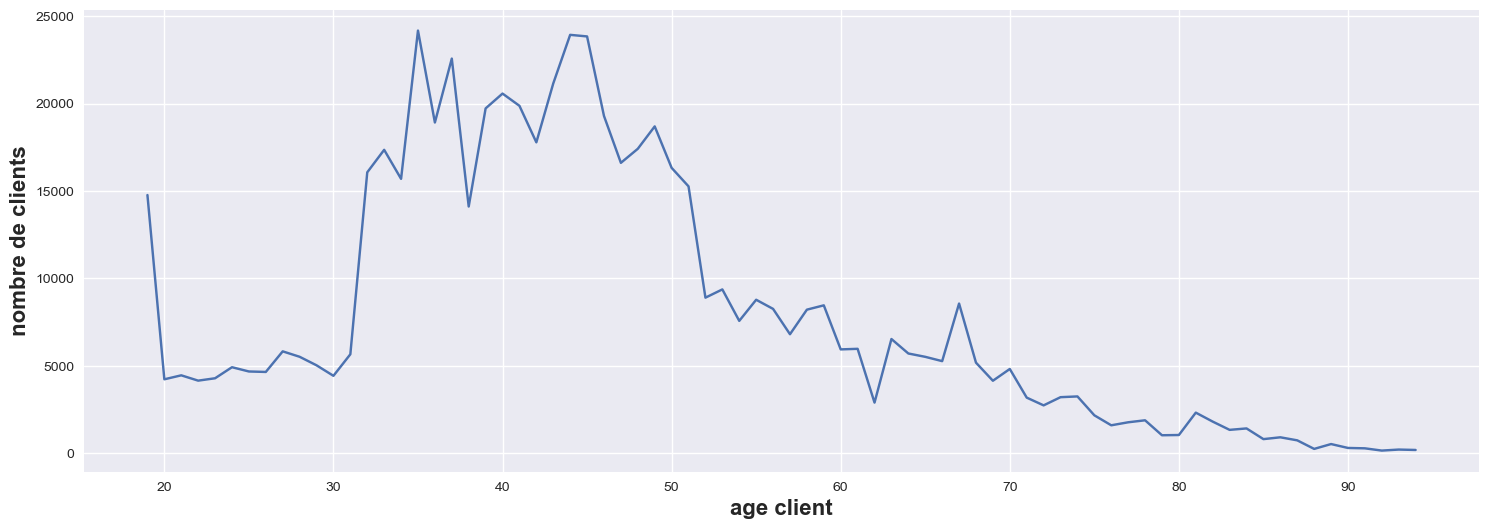

In [218]:
plt.figure(figsize=(18,6))
sns.lineplot(x="age", y="client_id", data=age_client)
ax.set_title("nombre de clients par age",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.xlabel("age client",weight='bold',size=16)
plt.ylabel("nombre de clients",weight='bold',size=16)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.');


### <span style="color : purple">4.1.8.3 - Répartition de la clientèle par tranche d'âge.</span>

In [219]:
tranche_age = data_part.groupby(["tranche_age"])["client_id"].nunique().reset_index(name="nb_tranche_age")
tranche_age

tranche_age  nb_tranche_age
0    (18, 25]            1283
1    (25, 40]            2441
2    (40, 55]            2549
3    (55, 70]            1672
4    (70, 85]             574
5   (85, 100]              75

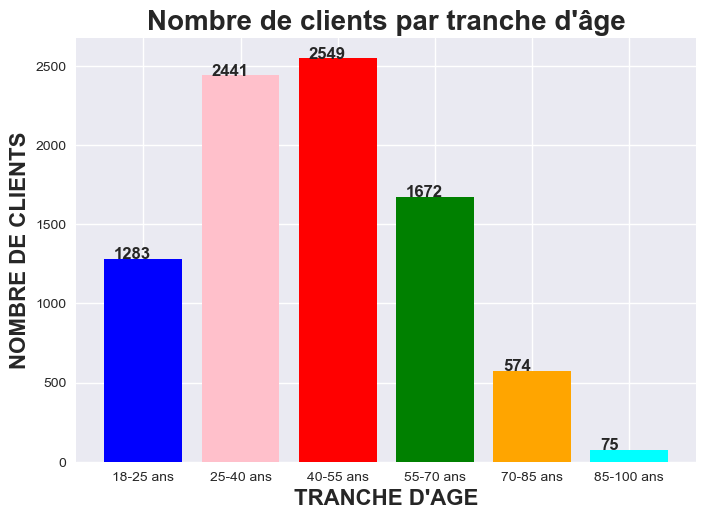

In [220]:
plt.title("Nombre de clients par tranche d'âge", weight ="bold", size =20)
height = tranche_age["nb_tranche_age"]
bars = ("18-25 ans", "25-40 ans", "40-55 ans", "55-70 ans", "70-85 ans", "85-100 ans")
x_pos = np.arange(len(bars))
plt.xlabel("TRANCHE D'AGE", weight="bold", size=16)
plt.ylabel("NOMBRE DE CLIENTS", weight="bold", size=16)
plt.bar(x_pos, height, color=("blue", "pink", "red", "green","orange","cyan"))
for i, v in enumerate(height):
    plt.text(x= i-0.3, y= v+1, s=str(v), size=12, weight="bold")
plt.xticks(x_pos, bars);


#### <span style="color : red">On note qu'une forte part de la clientèle se situe dans une tranche d'age comprise entre 25 et 55 ans .</span>

In [221]:
tranche_age["proportions"] =round((tranche_age["nb_tranche_age"]/ data_part["client_id"].count()*100),2)
tranche_age["proportions"] 

0    0.21
1    0.40
2    0.42
3    0.27
4    0.09
5    0.01
Name: proportions, dtype: float64

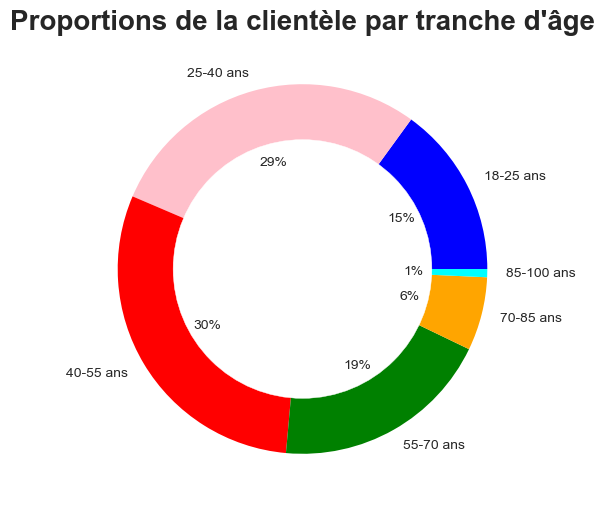

In [222]:
plt.figure(figsize=(18,6))
plt.title("Proportions de la clientèle par tranche d'âge", weight ="bold", size =20)
my_circle = plt.Circle((0,0),0.7,color="white")
names = ["18-25 ans", "25-40 ans", "40-55 ans", "55-70 ans", "70-85 ans", "85-100 ans"]
#colors = sns.color_palette("bright")
plt.pie(tranche_age["proportions"], labels=names,colors=["blue", "pink", "red", "green","orange","cyan"], autopct ="%0.0f%%")
p = plt.gcf()
p.gca().add_artist(my_circle);


### <span style="color : purple">4.1.8.3 - Panier moyen de la clientèle.</span>

In [223]:
print("le panier moyen s'élève à",round(total_par_client["price"].mean(),2),"€") #total_par_client est en 3.6.9

le panier moyen s'élève à 1341.35 €


### <span style="color : #8470FF"><u>4.1.9 - Répartition du C.A entre les clients via une courbe de Lorenz.</u></span>

### <span style="color : purple">4.1.9.1 - En fonction du prix.</span>

In [224]:
#total_par_client_pro = data_pro.groupby("client_id").sum()[["price"]]
#total_par_client_pro["price"].head()
total_par_client_pro = data_pro.groupby("client_id")[["price"]].sum().sort_values('price', ascending = False).reset_index()
total_par_client_pro.head()

client_id      price
0    c_1609  312755.08
1    c_4958  282654.61
2    c_6714  149783.75
3    c_3454  111766.71

In [225]:
#total_par_client_part = data_part.groupby("client_id").sum()[["price"]]
#total_par_client_part["price"].head()
total_par_client_part = data_part.groupby("client_id")[["price"]].sum().sort_values('price', ascending = False).reset_index()
total_par_client_part.head()

client_id    price
0    c_2899  5214.05
1    c_1570  5136.14
2    c_3263  5129.89
3    c_7319  5120.55
4    c_8026  4969.41

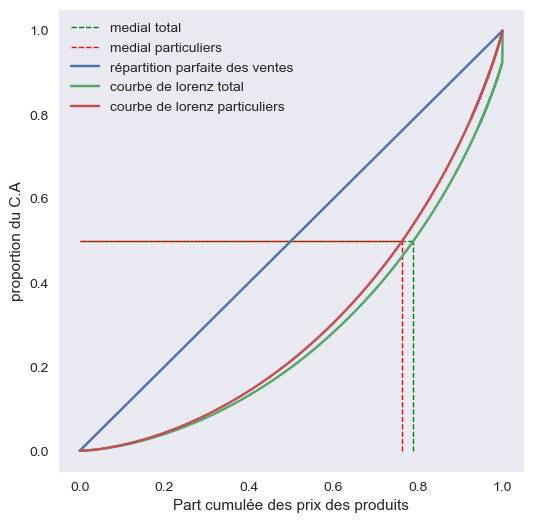

In [226]:
plt.subplots(figsize=[6,6])
plt.grid()


achat_total = total_par_client["price"]
#achat_pro = total_par_client_pro["price"]
achat_part =total_par_client_part["price"]

lorenz_total = np.cumsum(np.sort(achat_total))/achat_total.sum()
lorenz_total = np.append([0],lorenz_total)
medial_total = lorenz_total[(lorenz_total < 0.5)].size/lorenz_total.size
plt.vlines(medial_total, ymin=0, ymax=.5, color="green", linestyle="--", linewidth=1, label="medial total")
plt.hlines(xmin=medial_total, xmax=0, y=.5, color="green",linestyle="--", linewidth=1)
n_client_total= len(total_par_client.client_id)

#lorenz_pro = np.cumsum(np.sort(achat_pro))/achat_pro.sum()
#lorenz_pro = np.append([0],lorenz_pro)


lorenz_part = np.cumsum(np.sort(achat_part))/achat_part.sum()
lorenz_part = np.append([0],lorenz_part)
medial_part = lorenz_part[(lorenz_part < 0.5)].size/lorenz_part.size
plt.vlines(medial_part, ymin=0, ymax=.5, color="red", linestyle="--", linewidth=1, label="medial particuliers")
plt.hlines(xmin=medial_part, xmax=0, y=.5, color="red",linestyle="--", linewidth=1)
n_client_part= len(total_par_client_part.client_id)

x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(x,y, label="répartition parfaite des ventes")


plt.plot(np.linspace(0,1,len(lorenz_total)),lorenz_total, drawstyle="steps-post",label="courbe de lorenz total")
#plt.plot(np.linspace(0,1,len(lorenz_pro)),lorenz_pro, drawstyle="steps-post",label="courbe de lorenz pros")
plt.plot(np.linspace(0,1,len(lorenz_part)),lorenz_part, drawstyle="steps-post",label="courbe de lorenz particuliers")
plt.xlabel("Part cumulée des prix des produits")
plt.ylabel("proportion du C.A")
plt.legend()
plt.show()


In [227]:
print("la médiale pour la totalité des ventes est de",round(medial_total,2))

la médiale pour la totalité des ventes est de 0.79


In [228]:

# AUC = Area Under Curve : Aire sous la courbe
AUC_total = (lorenz_total.sum() - lorenz_total[-1]/2 - lorenz_total[0]/2)/n_client_total
# Surface entre la 1ere bissectrice et la courbe de Lorenz
S = 0.5 - AUC_total
gini_total = 2*S
print("Le coefficient de Gini pour la totalité de ventes est de ", round(gini_total,3))

Le coefficient de Gini pour la totalité de ventes est de  0.447


In [229]:
print("la médiale pour les ventes aux particuliers est de",round(medial_part,2))

la médiale pour les ventes aux particuliers est de 0.76


In [230]:
AUC_part = (lorenz_part.sum() - lorenz_part[-1]/2 - lorenz_part[0]/2)/n_client_part
S = 0.5 - AUC_part
gini_part = 2*S
print("Le coefficient de Gini pour les ventes aux particuliers est de ", round(gini_part,3))

Le coefficient de Gini pour les ventes aux particuliers est de  0.404


### <span style="color : purple">4.1.9.2 - En fonction de l'âge des clients.</span>

In [231]:
total_par_age = data_part.groupby("client_id")[["age"]].sum().sort_values('age', ascending = False).reset_index()
total_par_age.head()

client_id    age
0    c_2595  18816
1    c_7319  18032
2    c_2140  17526
3     c_794  17052
4    c_7421  16560

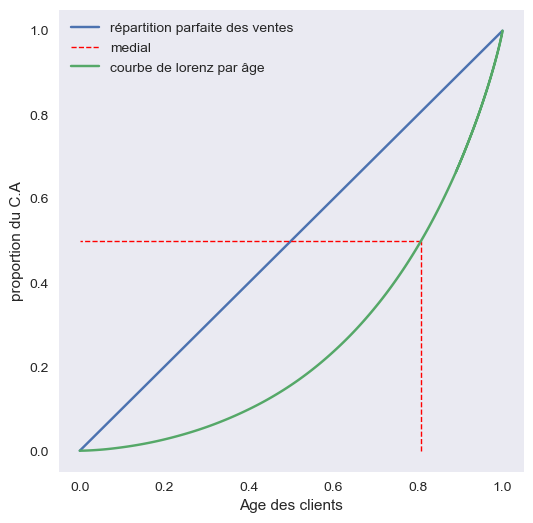

In [232]:
plt.subplots(figsize=[6,6])
plt.grid()

n_client_age= len(total_par_age.client_id)

achat_par_age =total_par_age["age"]

lorenz_age = np.cumsum(np.sort(achat_par_age))/achat_par_age.sum()
lorenz_age = np.append([0],lorenz_age)
medial = lorenz_age[(lorenz_age < 0.5)].size/lorenz_age.size

x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(x,y, label="répartition parfaite des ventes")

plt.vlines(medial, ymin=0, ymax=.5, color="red", linestyle="--", linewidth=1, label="medial")
plt.hlines(xmin=medial, xmax=0, y=.5, color="red",linestyle="--", linewidth=1)

plt.plot(np.linspace(0,1,len(lorenz_age)),lorenz_age, drawstyle="steps-post",label="courbe de lorenz par âge")
plt.xlabel("Age des clients")
plt.ylabel("proportion du C.A")
plt.legend()
plt.show()

In [233]:
#calcul de l'indice de gini
#surface sous la courbe de lorenz. Le 1er segment (lorenz[0]) est à moitié en dessous de 0,
#je le coupe donc en 2 et fais de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
AUC = (lorenz_age.sum() - lorenz_age[-1]/2 - lorenz_age[0]/2)/n_client_age
# Surface entre la 1ere bissectrice et la courbe de Lorenz
S = 0.5 - AUC
gini = 2*S
print("Le coefficient de Gini est de ", round(gini,3))

Le coefficient de Gini est de  0.487


## <span style="color : blue">4.2 - Julie -  Analyse plus ciblée sur les clients.</span>

### <span style="color : #8470FF"><u>4.2.1 - Liens entre le genre d'un client et les catégories de livres achetés.</u></span>

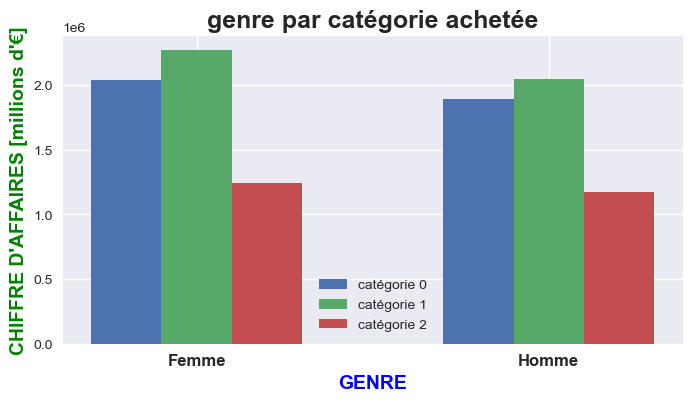

In [234]:
plt.subplots(figsize=[8,4])
fig.tight_layout()
plt.grid(True)
barWidth = 0.2

#définir la hauteur des barres
bars1=data_part[data_part["categ"]==0].groupby("sex")["price"].sum()
bars2=data_part[data_part["categ"]==1].groupby("sex")["price"].sum()
bars3=data_part[data_part["categ"]==2].groupby("sex")["price"].sum()

#définir la position des barres sur l'axe X.
b1 = np.arange(len(bars1))
b2 = [x + barWidth for x in b1]
b3 = [x + barWidth for x in b2]

#définition du plot
plt.bar(b1, bars1, width = barWidth, label="catégorie 0")
plt.bar(b2, bars2, width = barWidth, label="catégorie 1")
plt.bar(b3, bars3, width = barWidth, label="catégorie 2")

plt.title("genre par catégorie achetée", fontweight="bold", size =18)
plt.xlabel ("GENRE", fontweight="bold", size=14, color="b")
plt.ylabel ("CHIFFRE D'AFFAIRES [millions d'€]", fontweight="bold", size=14, color="green")
plt.xticks([r + barWidth for r in range(len(bars1))], ["Femme", "Homme"], fontweight="bold", size=12)
    
plt.legend()
plt.show()

In [252]:
repartition_genre = pd.crosstab(data_part["sex"], data_part["categ"])
repartition_genre

categ       0       1      2
sex                         
f      191919  110550  16429
m      177945  100227  15351

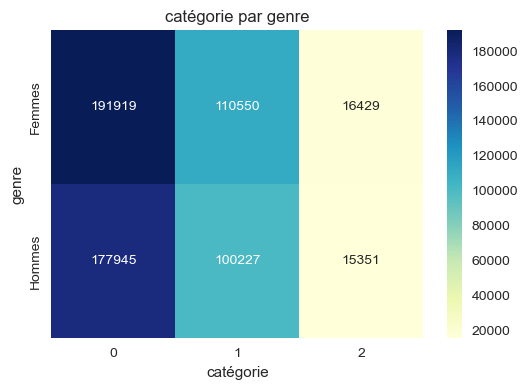

In [253]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(repartition_genre, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("catégorie par genre")
plt.xlabel("catégorie")
plt.ylabel("genre")
labels = ["Femmes", "Hommes"]
ax.set_yticklabels(labels)
plt.show()

### <span style="color : purple">4.2.1.1 - Test statistique (chi2).</span>

In [251]:
from scipy import stats

In [257]:
from scipy.stats import chi2_contingency

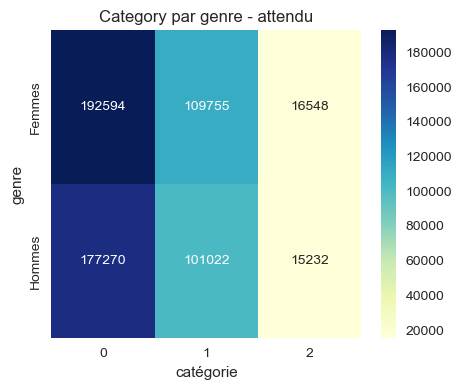

In [265]:
#c, p, dof, attendu = chi2_contingency(repartition_genre)

fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(attendu, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Category par genre - attendu")
plt.xlabel("catégorie")
plt.ylabel("genre"), 
labels = ["Femmes", "Hommes"]
ax.set_yticklabels(labels)
plt.show()

### Les valeurs du tableau de contingence sont très proches des valeurs attendues.

In [274]:
c, p, dof, attendu = chi2_contingency(repartition_genre)
print("La P-value est de",round(p,4))

La P-value est de 0.0001


### Chi2 test donne une valeur p<0.05, ce qui signifie que la catégorie du livre dépend du genre .L'intervale de confiance est supérieur à 95% ( 99.99%).

### <span style="color : #8470FF"><u>4.2.2 - Liens âge / montant total des achats.</u></span>

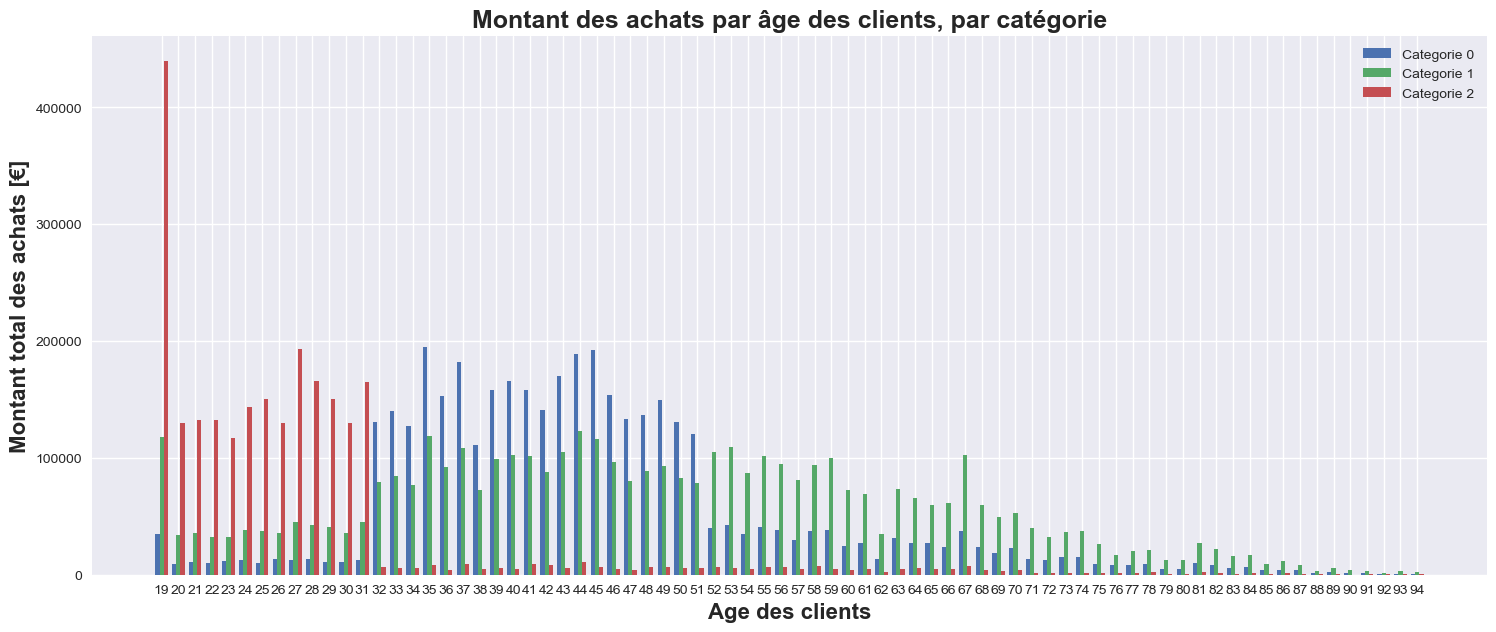

In [237]:
plt.subplots(figsize=[18,7])
barWidth = 0.25

#paramétrage de la taille des barres
bars1 = data_part[data_part["categ"] == 0].groupby("age")["price"].sum()
bars2 = data_part[data_part["categ"] == 1].groupby("age")["price"].sum()
bars3 = data_part[data_part["categ"] == 2].groupby("age")["price"].sum()

#paramétrage de la position des barres sur l'axe X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# faire le traçage
plt.bar(r1, bars1, width=barWidth, label='Categorie 0')
plt.bar(r2, bars2, width=barWidth, label='Categorie 1')
plt.bar(r3, bars3, width=barWidth, label='Categorie 2')

plt.xlabel("Age des clients", fontweight="bold",fontsize=16)
plt.ylabel("Montant total des achats [€]", fontweight="bold",fontsize=16)
plt.xticks([r + barWidth for r in range(len(bars1))],data_part["age"].sort_values().unique())

plt.title("Montant des achats par âge des clients, par catégorie", fontweight = "bold", fontsize = 18)
plt.legend()
plt.show()

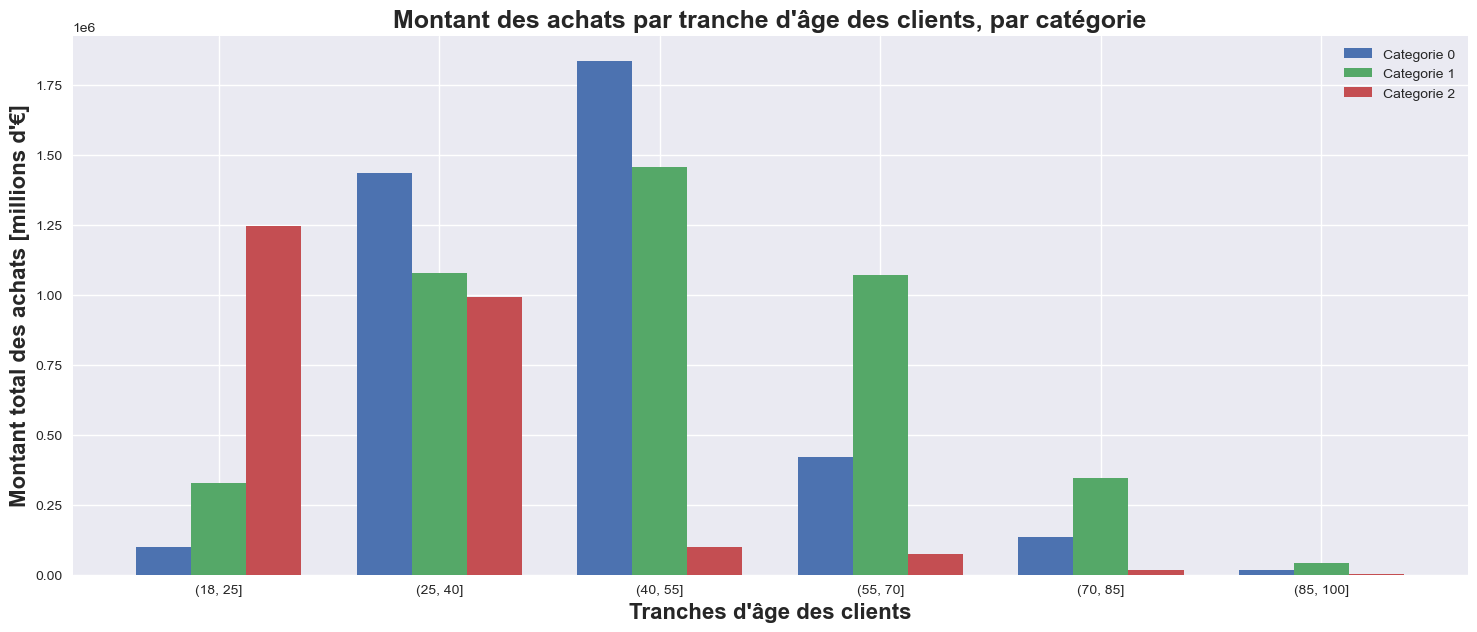

In [238]:
plt.subplots(figsize=[18,7])
barWidth = 0.25

#paramétrage de la taille des barres
bars1 = data_part[data_part["categ"] == 0].groupby("tranche_age")["price"].sum()
bars2 = data_part[data_part["categ"] == 1].groupby("tranche_age")["price"].sum()
bars3 = data_part[data_part["categ"] == 2].groupby("tranche_age")["price"].sum()

#paramétrage de la position des barres sur l'axe X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# faire le traçage
plt.bar(r1, bars1, width=barWidth, label='Categorie 0')
plt.bar(r2, bars2, width=barWidth, label='Categorie 1')
plt.bar(r3, bars3, width=barWidth, label='Categorie 2')

plt.xlabel("Tranches d'âge des clients", fontweight="bold",fontsize=16)
plt.ylabel("Montant total des achats [millions d'€]", fontweight="bold",fontsize=16)
plt.xticks([r + barWidth for r in range(len(bars1))],data_part["tranche_age"].sort_values().unique())

plt.title("Montant des achats par tranche d'âge des clients, par catégorie", fontweight = "bold", fontsize = 18)
plt.legend()
plt.show()

### <span style="color : #8470FF"><u>4.2.3 - Lien âge / fréquence d'achats.</u></span>

In [239]:
#calcul de la fréquencde d'achat pour chaque client.
purchase_frequency = data_part.groupby(["client_id"])["date"].count()
print(round(purchase_frequency.mean(),2))

71.26


In [240]:
# Ajout de la frequence d'achat en tant que nouvelle série dans de df "data_part".
data_part= data_part.join(purchase_frequency, on="client_id", rsuffix="_frequency")
#renommage de la série "date_frequency" en "frequence_achat"
data_part = data_part.rename(columns={"date_frequency":"frequence_achat"})
#calcul de la fréquence d'achat moyenne par tranche d'âge.
age_group = data_part.groupby(data_part["tranche_age"])
mean_purchase_frequency = age_group["frequence_achat"].mean().astype(int)

print(mean_purchase_frequency)
#mean_purchase_frequency.info()

tranche_age
(18, 25]      45
(25, 40]     153
(40, 55]     153
(55, 70]      82
(70, 85]      77
(85, 100]     74
Name: frequence_achat, dtype: int32


#### <span style="color : red">La fréquence moyenne est de 71 achats par client, dans la boutique en ligne.</span>

In [241]:
mean_purchase_frequency.info()

<class 'pandas.core.series.Series'>
CategoricalIndex: 6 entries, (18, 25] to (85, 100]
Series name: frequence_achat
Non-Null Count  Dtype
--------------  -----
6 non-null      int32
dtypes: int32(1)
memory usage: 298.0 bytes


In [242]:
data_part['tranche_age_moyenne'] = data_part['tranche_age'].apply(lambda x: str(int(x.left)) + "-" + str(int(x.right)))
age_group = data_part.groupby(data_part["tranche_age_moyenne"])
mean_purchase_frequency = age_group["frequence_achat"].mean()
mean_purchase_frequency = mean_purchase_frequency.reset_index()

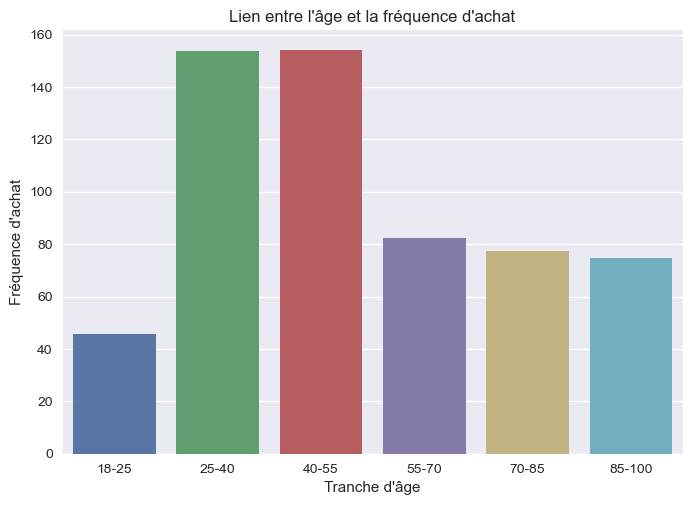

In [243]:
sns.barplot(x='tranche_age_moyenne', y='frequence_achat', data=mean_purchase_frequency)
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence d'achat")
plt.title("Lien entre l'âge et la fréquence d'achat")
plt.show()

#### <span style="color : red">- La fréquence moyenne d'achat est la plus faible en ce qui concerne la tranche des 18-25 ans, mais se montre bien plus élevée lorsque l'on arrive sur les tranches allant de 25 à 55 ans. Elle rebaisse ensuite à partir de la tranche au delà des 55 ans, pour diminuer progressivement par la suite.</span>

### <span style="color : #8470FF"><u>4.2.4 - Lien âge / taille du panier moyen.</u></span>

In [244]:
age_group = data_part.groupby(data_part["tranche_age"])
mean_basket = age_group["price"].mean()

mean_basket = mean_basket.reset_index()
mean_basket["tranche_age_moyenne"] = mean_basket["tranche_age"].apply(lambda x: str(int(x.left)) + "-" + str(int(x.right)) )
mean_basket

tranche_age      price tranche_age_moyenne
0    (18, 25]  40.179987               18-25
1    (25, 40]  17.478989               25-40
2    (40, 55]  13.830537               40-55
3    (55, 70]  16.888840               55-70
4    (70, 85]  16.742768               70-85
5   (85, 100]  16.895586              85-100

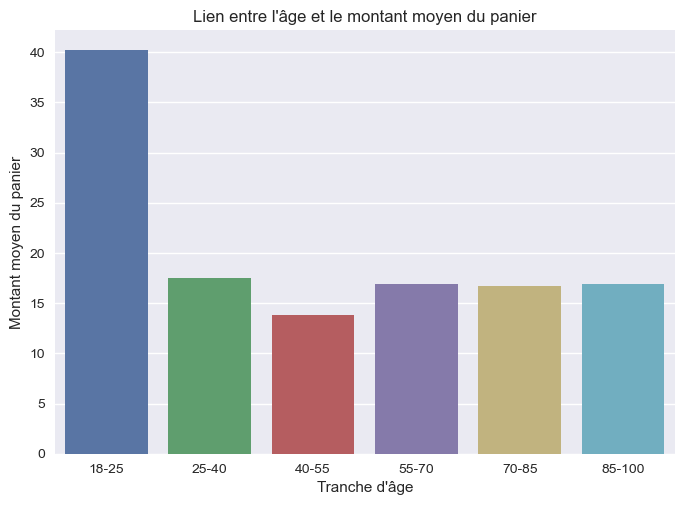

In [245]:
sns.barplot(x='tranche_age_moyenne', y='price', data=mean_basket)
plt.xlabel("Tranche d'âge")
plt.ylabel("Montant moyen du panier")
plt.title("Lien entre l'âge et le montant moyen du panier")
plt.show()

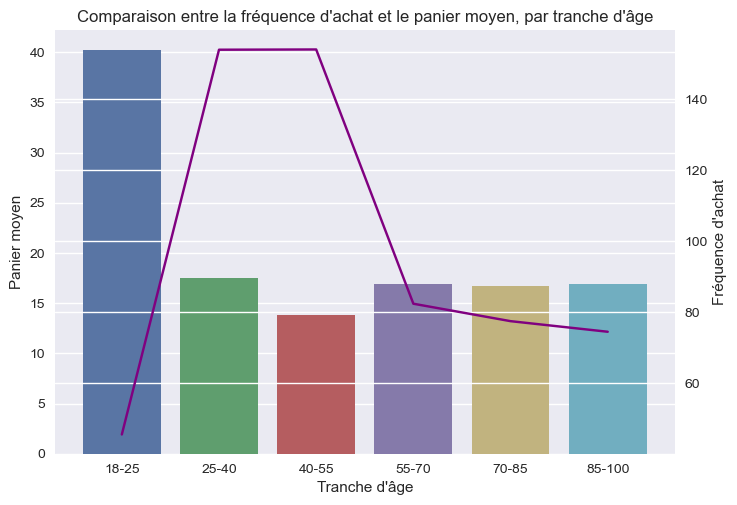

In [246]:
fig, ax1 = plt.subplots()

sns.barplot(x='tranche_age_moyenne', y='price', data=mean_basket, ax=ax1)
ax1.set_xlabel("Tranche d'âge")
ax1.set_ylabel("Panier moyen")

ax2  =ax1.twinx()
sns.lineplot(x='tranche_age_moyenne', y='frequence_achat', data=mean_purchase_frequency, color="purple",ax=ax2)
ax2.set_ylabel("Fréquence d'achat")

plt.title("Comparaison entre la fréquence d'achat et le panier moyen, par tranche d'âge")
plt.show()

#### <span style="color : red">- La tranche d'âge des 18-25 ans possède, et de loin,  le plus gros panier moyen. Il est plus de 2 fois supérieur à chacune des autres tranches d'âge .</span>
#### <span style="color : red">- Si l'on compare avec le graphique précédent qui compare la fréquence d'achat (4.2.3), on peut voir que cette tranche des 18-25 ans effectue moins souvent des achats, mais ceux-ci sont plus conséquents en terme de montant.Cela est certainement dû à des achats liés aux besoins pour leurs études (rentrée scolaire,etc.)
</span>

#### <span style="color : red">- Pour ce qui est des autres tranches d'âge, on peut voir, à l'inverse, que celles comprises entre 25 et 55 ans, ont un panier moyen bien inférieur à leur fréquence d'achat,ce qui peut démontrer un achat pouvant suivre des besoins réguliers mais étalées dans le temps. Les tranches supérieures à 55 ans sont sensiblement dans les mêmes proportions que dans la fréquence d'achat.
</span>

### <span style="color : #8470FF"><u>4.2.5 - Lien âge / catégorie des livres achetés.</u></span>

In [247]:
age_categ= pd.crosstab(data_part["tranche_age"], data_part["categ"])
print(age_categ)

categ             0      1      2
tranche_age                      
(18, 25]       9149  15905  16490
(25, 40]     134596  52689  13042
(40, 55]     172685  71005   1094
(55, 70]      39310  52207    865
(70, 85]      12557  16916    250
(85, 100]      1567   2055     39


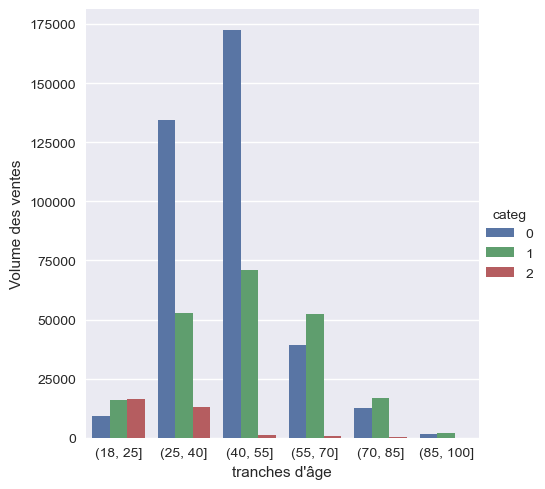

In [248]:
sns.catplot(x = "tranche_age", kind = "count", hue="categ", data= data_part)
plt.ylabel("Volume des ventes")
plt.xlabel("tranches d'âge")
plt.show()

### 